In [151]:
# import libraries
import pandas as pd
import numpy as np
import emoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [153]:
# Load the datasets
threads_df = pd.read_csv("Data/threads_reviews.csv")     
twitter_df = pd.read_csv("Data/twitter_reviews.csv") 

### Looking at Threads dataset

In [156]:
# First 5 Threads
print(threads_df.head())

        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43  


In [158]:
# Last 5 threads
print(threads_df.tail())

          source                                 review_description  rating  \
32905  App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906  App Store              Add Search and hashtag like Twitter !       1   
32907  App Store                                        bad twister       1   
32908  App Store                       Yet another trash from Meta.       1   
32909  App Store  Nothing special this app is just a copy of twi...       1   

               review_date  
32905  2023-07-06 01:23:55  
32906  2023-07-19 08:01:06  
32907  2023-07-17 06:39:13  
32908  2023-07-07 17:47:16  
32909  2023-07-07 07:01:43  


- threads dataset has few 'app_store' data points.
- to check how many 'app_store' and handle

### Looking at Twitter dataset

In [162]:
# First 5 Twitter
print(twitter_df.head())

   Unnamed: 0                             review_id       pseudo_author_id  \
0     1988084  f1584af1-3c91-4b7b-ade9-bd88c8d7a057  218447363838332529729   
1     1988085  3244b60a-8656-4fad-aaa6-7f199b6bf5bd  270227692644125640170   
2     1988086  f6aa48d3-e35a-454f-8eb2-b2605fbd5632  237950927094411183998   
3     1988087  00d82206-a895-432f-9761-baa3eb181749  153032963929626212115   
4     1988088  34a514ff-8f35-4e57-a667-18adfe416f25  174367592227204047784   

           author_name                                        review_text  \
0         Ay********an                                                 Ok   
1          Pr*******ai  App and website quality has consistently been ...   
2  St***************ch                          Great app; no complaints.   
3          A.*******ey                App crashes whenever I try to post.   
4        TA*********AT  Forced to download app cos I cant see tweets w...   

   review_rating  review_likes author_app_version     review_timesta

In [164]:
# Last 5 twitter
print(twitter_df.tail())

       Unnamed: 0                             review_id  \
34783     2022867  8eb3e09e-0269-4000-bf1d-bca068aab0d4   
34784     2022868  07147f9e-12e2-41e5-9909-9fd58833b9b1   
34785     2022869  2993c3c6-ae99-4b7a-922b-2f9ad4cc8fd1   
34786     2022870  4e199ee2-5d5a-4250-8d33-c616c9a425d3   
34787     2022871  3ef51c55-d534-45cb-847c-94a7f1fcc8a2   

            pseudo_author_id    author_name  \
34783  183174234511158497367  Av*********an   
34784  407012831597074592641             **   
34785  631000167645252964295       In****r8   
34786  291283487932051543175   Ro********er   
34787  148725782584965520105  Al*********ić   

                                             review_text  review_rating  \
34783                                 This app is a cyst              1   
34784  見つける機能廃止の代わりのハイライトの通信がやたら時間かかる。タイムラインも読み込みに時間か...              3   
34785                                        It's so bad              1   
34786  Horrible because Elon doesn't know how to do a...      

- the twitter dataset has many unwanted columns, should handle this
- it also has different language other tha english, should handle this

### Threads Info

In [168]:
# Info print for threads
print(threads_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB
None 



### Twitter Info

In [171]:
# Info print for twitter
print(twitter_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34788 entries, 0 to 34787
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          34788 non-null  int64 
 1   review_id           34788 non-null  object
 2   pseudo_author_id    34788 non-null  object
 3   author_name         34788 non-null  object
 4   review_text         34785 non-null  object
 5   review_rating       34788 non-null  int64 
 6   review_likes        34788 non-null  int64 
 7   author_app_version  27874 non-null  object
 8   review_timestamp    34788 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.4+ MB
None


In [173]:
# Columns for confirmation
print("Threads columns:", threads_df.columns.tolist())
print("Twitter columns:", twitter_df.columns.tolist())

Threads columns: ['source', 'review_description', 'rating', 'review_date']
Twitter columns: ['Unnamed: 0', 'review_id', 'pseudo_author_id', 'author_name', 'review_text', 'review_rating', 'review_likes', 'author_app_version', 'review_timestamp']


- We see Twitter has unwanted columns not required for our project

#### Missing values - Threads

In [177]:
# Missing Values of Threads
print("\nMissing values (Threads):\n", threads_df.isnull().sum())



Missing values (Threads):
 source                0
review_description    0
rating                0
review_date           0
dtype: int64


#### Missing Values - Twitter

In [180]:
# Missing Values of Twitter
print("\nMissing values (Twitter):\n", twitter_df.isnull().sum())


Missing values (Twitter):
 Unnamed: 0               0
review_id                0
pseudo_author_id         0
author_name              0
review_text              3
review_rating            0
review_likes             0
author_app_version    6914
review_timestamp         0
dtype: int64


- Twitter has missing values in 2 columns - should handle this

## Data cleaning for threads for now

In [184]:
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# ===========================================================
# 1. DUPLICATE DETECTION (RAW TEXT)
# ===========================================================

print("\n===== RAW DUPLICATE CHECK =====")
df = threads_df.copy()
dups_raw = df[df.duplicated(subset=["review_description"], keep=False)]
dups_raw_idx = dups_raw.reset_index()[["index", "review_description"]]

print("Total RAW duplicate rows:", len(dups_raw_idx))
print("\n--- SAMPLE RAW DUPLICATES ---")
print(dups_raw_idx.head(10))


# ===========================================================
# 2. LONG-REVIEW DUPLICATE REMOVAL
# ===========================================================

def is_long_review(text, min_words=15):
    return len(str(text).split()) >= min_words

df["is_long"] = df["review_description"].apply(is_long_review)

df_long = df[df["is_long"] == True].copy()
df_short = df[df["is_long"] == False].copy()

print("\n===== LONG REVIEW STATS =====")
print("Long reviews:", df_long.shape[0])
print("Short reviews:", df_short.shape[0])

dup_long_mask = df_long.duplicated(subset=["review_description"], keep=False)
df_long_dups = df_long[dup_long_mask]

print("\n===== LONG DUPLICATES FOUND =====")
print("Total long duplicate rows:", df_long_dups.shape[0])

dup_groups_long = (
    df_long_dups.reset_index()
                .groupby("review_description")["index"]
                .apply(list)
                .reset_index(name="row_numbers")
)

print("Distinct long duplicated texts:", len(dup_groups_long))
print("\n--- SAMPLE LONG DUPLICATE GROUPS ---")
print(dup_groups_long.head(10))

before_long = df_long.shape[0]
df_long_clean = df_long.drop_duplicates(subset=["review_description"], keep="first")
after_long = df_long_clean.shape[0]

print("\n===== LONG DUPLICATE REMOVAL =====")
print("Before:", before_long)
print("After :", after_long)
print("Removed:", before_long - after_long)

df = pd.concat([df_long_clean, df_short], ignore_index=True)
df.drop(columns=["is_long"], inplace=True)

print("\n===== AFTER LONG-DEDUPE: df.shape =====")
print(df.shape)


# ===========================================================
# 3. BRAND NORMALIZATION MAP
# ===========================================================

brand_map = {
    # Twitter / X
    r"\btwitter\b": "twitter",
    r"\btwt\b": "twitter",
    r"\btwit\b": "twitter",
    r"\btwwitter\b": "twitter",
    r"\btwiter\b": "twitter",
    r"\bx\b": "twitter",

    # Threads
    r"\bthreads\b": "threads",
    r"\bthread\b": "threads",
    r"\btread\b": "threads",
    r"\btreads\b": "threads",
    r"\bthreds\b": "threads",

    # Instagram
    r"\binstagram\b": "instagram",
    r"\binsta\b": "instagram",
    r"\binstgram\b": "instagram",
    r"\binstragram\b": "instagram",

    # Facebook + Meta
    r"\bfacebook\b": "facebook",
    r"\bfacebok\b": "facebook",
    r"\bfb\b": "facebook",
    r"\bmeta\b": "facebook",
}

def normalize_brands(text):
    text = str(text).lower()
    for pattern, repl in brand_map.items():
        text = re.sub(pattern, repl, text)
    return text


# ===========================================================
# 4. CLEANING PIPELINE (COMBINED)
# ===========================================================

stop_words = set(stopwords.words("english"))
negations = {"no", "not", "nor", "dont", "can't", "cannot", "never"}
stop_words = stop_words - negations

lemmatizer = WordNetLemmatizer()

# Custom stopwords - INCLUDING normalized brand names
custom_stopwords = set([
    "app", "apps", "application", "applications",
    "thread", "threads", "instagram", "twitter", 
    "facebook", "experience", "im", "account"
])

def clean_text(text):
    # Step 1: Normalize brands FIRST (before any other processing)
    text = normalize_brands(text)
    
    # Step 2: Basic cleaning
    text = str(text)
    text = text.lower()
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9 ]", " ", text)  # Remove special chars (added space)
    text = re.sub(r"\s+", " ", text).strip()    # Normalize whitespace
    
    # Step 3: Tokenization and stopword removal
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in custom_stopwords]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

# Apply cleaning
df["review_cleaned"] = df["review_description"].apply(clean_text)

print("\n===== CLEANING CHECK =====")
for i in range(5):
    print("\nOriginal:", df.loc[i, "review_description"])
    print("Cleaned :", df.loc[i, "review_cleaned"])


# ===========================================================
# 5. REMOVE EMPTY CLEANED ROWS
# ===========================================================

before = df.shape[0]
df = df[df["review_cleaned"].str.strip() != ""]
after = df.shape[0]

print("\n===== EMPTY CLEANED TEXT REMOVAL =====")
print("Before:", before)
print("After:", after)
print("Removed:", before - after)

print("\n===== FINAL DATASET SHAPE =====")
print(df.shape)


===== RAW DUPLICATE CHECK =====
Total RAW duplicate rows: 7124

--- SAMPLE RAW DUPLICATES ---
   index                                 review_description
0     23  It's a good start but they have to add some th...
1    105  It's a great start! I do feel like when adding...
2    222  The user experience so far so good, clean and ...
3   3773  It's a good start but they have to add some th...
4   4516  It's a great start! I do feel like when adding...
5   4604  The user experience so far so good, clean and ...
6   5915                               Not working properly
7   5938                               Not working properly
8   5939                               Not working properly
9   6050                               Not working properly

===== LONG REVIEW STATS =====
Long reviews: 8301
Short reviews: 24609

===== LONG DUPLICATES FOUND =====
Total long duplicate rows: 6
Distinct long duplicated texts: 3

--- SAMPLE LONG DUPLICATE GROUPS ---
                                  revi

In [185]:
# Apply cleaning
threads_clean  =  df.copy()
threads_clean["review_cleaned"] = threads_clean["review_description"].apply(clean_text)


print("\n--- CLEANING CHECK: original vs cleaned ---")
for i in range(3):
    print("\nOriginal:", threads_clean.loc[i, "review_description"])
    print("Cleaned :", threads_clean.loc[i, "review_cleaned"])



--- CLEANING CHECK: original vs cleaned ---

Original: Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression.
Cleaned : meh not greatest chromebook seems customized phone open little screen expand resize reason complete mystery judging fact every know resizeable seems like conscious choice developer something like beyond understanding suggests control freak approach not great way make first impression

Original: Pretty good for a first launch!! Its easy to use and self-explanatory and I'd say the algorithm is good as well. It has great *potential* but a few things need improvement:

In [186]:
import nltk
from nltk.probability import FreqDist

# Make sure you have NLTK punkt tokenizer
nltk.download("punkt")

# Combine all reviews (or you can do per cluster)
all_words = " ".join(threads_clean["review_cleaned"]).split()  # or nltk.word_tokenize(text)
freq_dist = FreqDist(all_words)

# Top 20 words overall
print("Top 20 words overall:")
for word, freq in freq_dist.most_common(20):
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 words overall:
good: 4408
not: 3433
like: 3157
nice: 2270
post: 1786
better: 1782
no: 1753
people: 1580
see: 1549
need: 1458
use: 1414
follow: 1383
great: 1241
feature: 1207
please: 1163
want: 1095
new: 1052
best: 1037
one: 1027
time: 988


## SENTIMENT ANALYSIS : USING VADER + KNN

By applying KMeans clustering to the compound sentiment scores, we could segment reviews into three clusters. The centroids of these clusters inform the thresholds for classifying sentiment, allowing for more objective labeling than manual cutoff values.

In [187]:

# ----------- LOAD DATA --------------
df = threads_clean.copy()     
# ------------------------------------


# ---------- VADER SCORES -----------
analyzer = SentimentIntensityAnalyzer()
df["compound"] = df["review_cleaned"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
compound_array = df["compound"].values.reshape(-1,1)
# ------------------------------------

# ----------- KMEANS 3 CLUSTERS -----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters = kmeans.fit_predict(compound_array)
df["cluster"] = clusters

# map centroids -> pos/neu/neg
centroids = kmeans.cluster_centers_.flatten()
order = np.argsort(centroids)
label_map = {order[0]: "negative", order[1]: "neutral", order[2]: "positive"}

df["sentiment"] = df["cluster"].map(label_map)
# ------------------------------------

print(df[["review_description","review_cleaned","compound","sentiment"]].head())


                                  review_description  \
0  Meh. Not the greatest experience on a Chromebo...   
1  Pretty good for a first launch!! Its easy to u...   
2  For a brand new app, it's very well optimized....   
3  Great app with a lot of potential! However, th...   
4  The app is good, but it needs a lot of functio...   

                                      review_cleaned  compound sentiment  
0  meh not greatest chromebook seems customized p...   -0.4479  negative  
1  pretty good first launch easy use self explana...    0.9893  positive  
2  brand new well optimized however missing quite...    0.8960  positive  
3  great lot potential however lot need fixed exa...    0.1280   neutral  
4  good need lot functionality example searching ...    0.8176  positive  


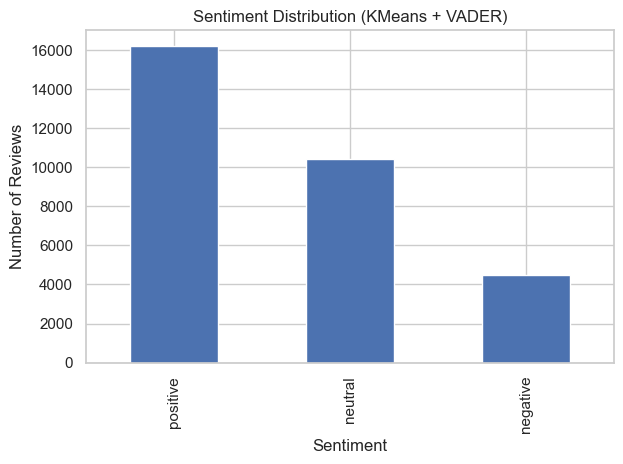

In [188]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar")

plt.title("Sentiment Distribution (KMeans + VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


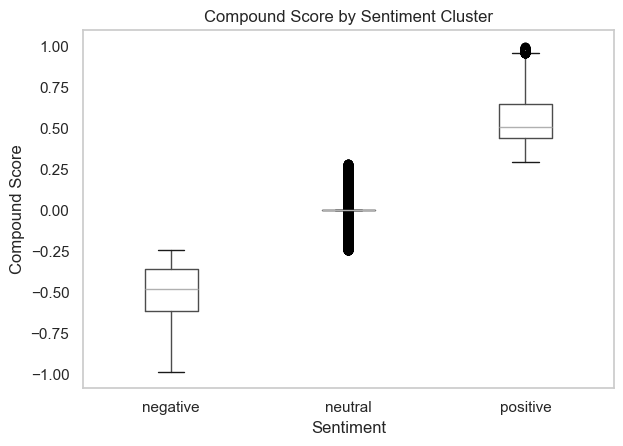

In [189]:
df.boxplot(column="compound", by="sentiment", grid=False)

plt.title("Compound Score by Sentiment Cluster")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Compound Score")
plt.tight_layout()
plt.show()


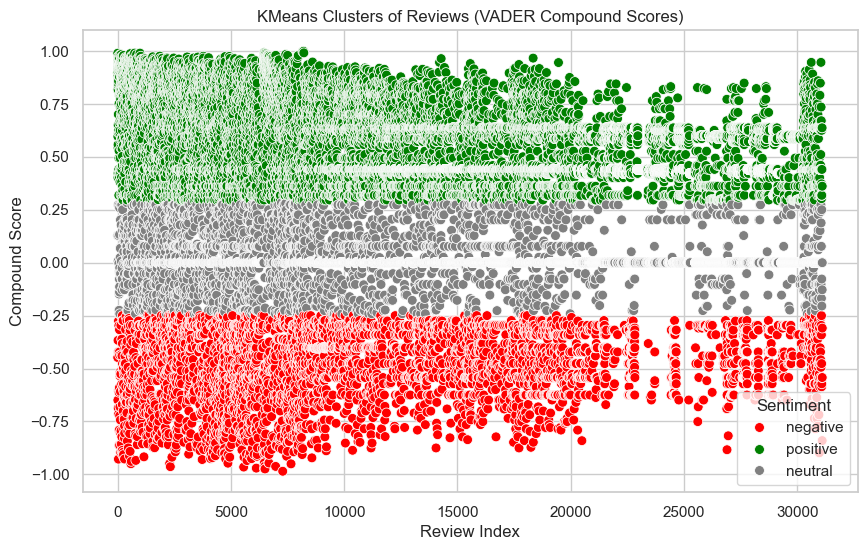

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot the clusters along the compound score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=range(len(df)), 
    y="compound", 
    hue="sentiment", 
    palette={"negative":"red", "neutral":"gray", "positive":"green"},
    data=df,
    s=50
)
plt.title("KMeans Clusters of Reviews (VADER Compound Scores)")
plt.xlabel("Review Index")
plt.ylabel("Compound Score")
plt.legend(title="Sentiment")
plt.show()


The KNN clustering makes a custom threshold for us without us needing to have a hard coded threshold for different sentiments.The reviews seem to be perfectly clustered with respect to their respective scores.

Top words in negative cluster: [('not', 1052), ('no', 919), ('bad', 519), ('post', 460), ('people', 362), ('like', 326), ('worst', 326), ('see', 322), ('time', 321), ('follow', 303)]
Top words in positive cluster: [('good', 3978), ('like', 2486), ('nice', 2215), ('better', 1597), ('great', 1182), ('not', 1145), ('best', 993), ('love', 952), ('please', 905), ('people', 900)]
Top words in neutral cluster: [('not', 1236), ('copy', 547), ('post', 466), ('need', 418), ('use', 409), ('see', 397), ('no', 386), ('follow', 364), ('like', 345), ('want', 334)]


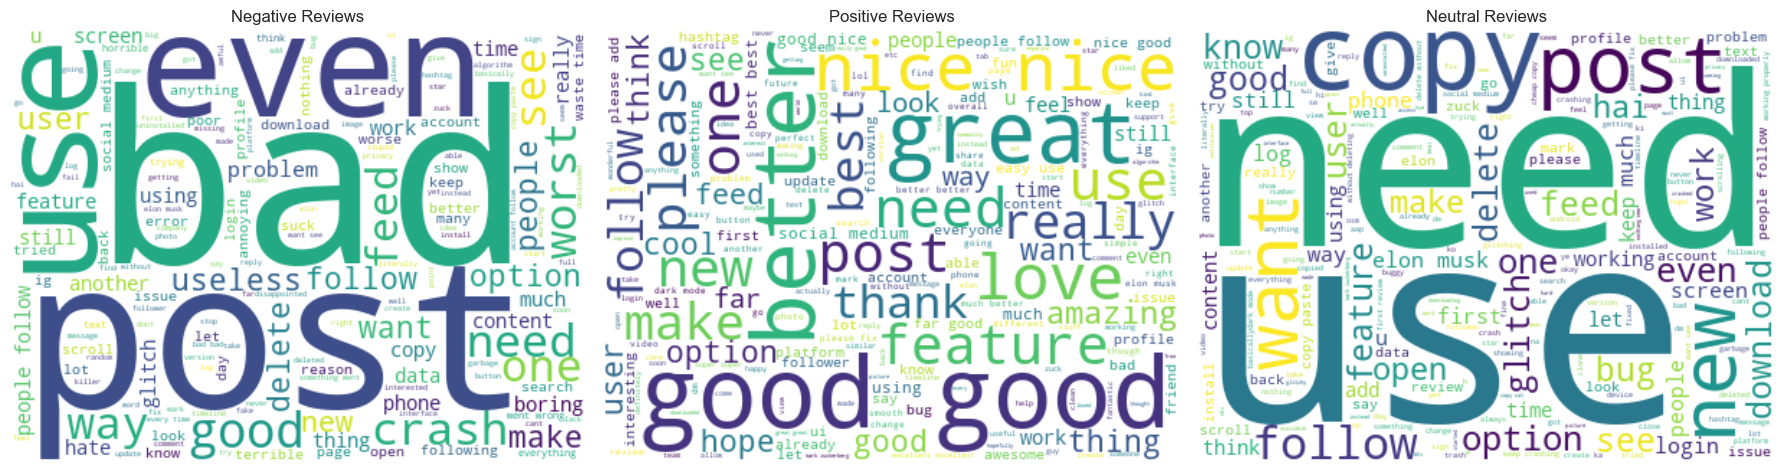

In [192]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to get top words
def get_top_words(text_series, n=10):
    words = " ".join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)

# Plot word clouds for each sentiment cluster
sentiments = df["sentiment"].unique()
plt.figure(figsize=(18,6))

for i, sentiment in enumerate(sentiments, 1):
    text = df[df["sentiment"] == sentiment]["review_cleaned"]
    
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=300, background_color="white").generate(" ".join(text))
    
    # Plot
    plt.subplot(1, len(sentiments), i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{sentiment.capitalize()} Reviews")
    
    # Print top 10 words in console
    print(f"Top words in {sentiment} cluster:", get_top_words(text))

plt.tight_layout()
plt.show()


- The Negative word cloud clearly shows us few problems or sentiments like bad, crash, uselss etc
- Where as the positive word cloud shows us few workds like great, love, better, nice etc as the important features.
- Lastly the neutral word cloud shows general opinions inclusing follow, download, content, copy etc

## Data Cleaning Pipeline 2 (for topic modelling) 

In [200]:
# Data Cleaning 2
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser

negations = {"no", "not", "nor", "dont", "can't", "cannot", "never"}
stop_words = stop_words - negations

# App-specific words to remove
custom_stopwords_tm = set([
    "app", "apps", "application", "applications",
    "experience", "account", 
])

# ============================
#  Cleaning Function
# ============================
def clean_text_for_tm(text):
    # text = str(text).lower()
    # text = emoji.replace_emoji(text, replace="")
    # text = re.sub(r"http\S+|www\S+", "", text)
    # text = re.sub(r"[^a-zA-Z\s]", " ", text)  # keep only letters
    
    tokens = simple_preprocess(text, deacc=True)

    # # remove stopwords
    # tokens = [t for t in tokens if t not in stop_words]
    # tokens = [t for t in tokens if t not in custom_stopwords_tm]

    return tokens

# ============================
#  Bigram Builder
# ============================
def create_bigrams(texts):
    bigram = Phrases(texts, min_count=10, threshold=10)
    bigram_mod = Phraser(bigram)
    return [bigram_mod[doc] for doc in texts]

# ============================
# Prepare Dataset for Topic Modeling
# ============================
def prepare_tm_texts(df):
    docs = df["review_cleaned"].apply(clean_text_for_tm).tolist()
    docs_bigrams = create_bigrams(docs)
    return docs_bigrams



## Topic Modelling 1 with sentiment labels (pos, neu, neg)

In [203]:
threads_pos = df[df["sentiment"] == "positive"]
threads_neu = df[df["sentiment"] == "neutral"]
threads_neg = df[df["sentiment"] == "negative"]


from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel


def train_lda_model(docs_bigrams, num_topics=5):

    dictionary = Dictionary(docs_bigrams)
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    corpus = [dictionary.doc2bow(doc) for doc in docs_bigrams]

    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        chunksize=2000,
        passes=10,
        alpha='auto'
    )

    coherence_model = CoherenceModel(
        model=lda_model,
        texts=docs_bigrams,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_score = coherence_model.get_coherence()

    return lda_model, corpus, dictionary, coherence_score



def run_lda(docs_df):
    docs_bigrams = prepare_tm_texts(docs_df)

    topic_range = range(3, 7)
    coherence_scores = {}

    for k in topic_range:
        lda_model, corpus, dictionary, coherence = train_lda_model(docs_bigrams, num_topics=k)
        coherence_scores[k] = coherence
        print(f"k={k} Coherence={coherence:.4f}")

    best_k = max(coherence_scores, key=coherence_scores.get)
    print("\nBest number of topics =", best_k)

    final_lda, corpus, dictionary, coherence = train_lda_model(docs_bigrams, num_topics=best_k)

    print("Final Coherence Score:", coherence)

    topics = final_lda.show_topics(num_topics=-1, num_words=15, formatted=False)

    for topic_id, words in topics:
        print(f"TOPIC {topic_id+1}:")
        top_terms = [w for w, weight in words]
        print(", ".join(top_terms))
        print()

    return final_lda    # 


print("\n===== THREADS POSITIVE TOPICS =====")
lda_pos = run_lda(threads_pos)

print("\n===== THREADS NEUTRAL TOPICS =====")
lda_neu = run_lda(threads_neu)

print("\n===== THREADS NEGATIVE TOPICS =====")
lda_neg = run_lda(threads_neg)



===== THREADS POSITIVE TOPICS =====
k=3 Coherence=0.5007
k=4 Coherence=0.4954
k=5 Coherence=0.5372
k=6 Coherence=0.5322

Best number of topics = 5
Final Coherence Score: 0.5371852215490278
TOPIC 1:
cool, post, not, follow, see, try, not_bad, care, open, seems, even, people, people_follow, feed, much_better

TOPIC 2:
good, love, best, amazing, far, awesome, thank, perfect, really, aap, already, interesting, loving, absolutely, pretty

TOPIC 3:
better, great, lol, thanks, way, fun, zuck, elon, first_review, first, mark, loved, wonderful, smooth, job

TOPIC 4:
nice, super, wow, excellent, ok, download, superb, best_ever, beautiful, censoring, work, hai, honestly, play, recommend

TOPIC 5:
like, need, please, feature, one, make, use, would, not, add, option, no, new, hope, also


===== THREADS NEUTRAL TOPICS =====
k=3 Coherence=0.5255
k=4 Coherence=0.4898
k=5 Coherence=0.5122
k=6 Coherence=0.5328

Best number of topics = 6
Final Coherence Score: 0.5327621217570496
TOPIC 1:
login, elon_mus

So the final insights for LDA topic modelling and topic for different sentiments could be categorised as:
 **Positive Sentiment Analysis** with a coherence score of **k=5 Coherence=0.5372**


**1. Enthusiastic Praise** — *love, best, amazing, awesome, perfect*  
Pure fan reactions. Users are thrilled with Threads and use highly emotional language.

**2. Comparative Wins** — *better, great, zuck, elon, first_review*  
People celebrating Threads as superior to Twitter/X, often referencing the Zuckerberg–Musk rivalry.

**3. Cautious Interest** — *cool, post, follow, not_bad, try*  
Curious early adopters exploring features without full commitment yet.

**4. Quality Approval** — *nice, excellent, superb, beautiful, recommend*  
Focused appreciation for design, smoothness, and overall execution.

**5. Wishful Feedback** — *need, please, feature, add, hope*  
Happy users who still want improvements like better DMs or customization options.

**Insight:** Even positive users want more features, suggesting Threads launched as a solid MVP but not a complete product.

---

**Neutral Sentiment Analysis** with coherence score for **k=6 Coherence=0.5328**


**1. Platform Wars** — *elon_musk, zuck, copy_cat, copied, censoring*  
Discussion about Threads vs. Twitter drama and copying accusations. Neither fully positive nor negative.

**2. Social Observations** — *post, people, follow, feed, comment*  
General commentary on how people use the app without strong opinions.

**3. Bug Reports** — *glitch, not_working, screen, bug, log*  
Matter-of-fact technical issue reporting without anger.

**4. Privacy Worries** — *delete, data, censorship, trash, privacy*  
Concerns about Meta’s data practices and account control.

**5. Hindi/Urdu Reviews** — *hai, aap, nhi, ki, bhai, kya*  
Non-English reviews showing Threads’ global reach, mostly from South Asia.

**6. Feature Requests** — *need, add, update, option, dm, button*  
Practical suggestions for improvements without complaints.

**Insight:** Neutral reviews are information-rich—revealing technical problems, privacy concerns, and feature gaps without emotional bias.

---

**Negative Sentiment Analysis** for the coherence score for **k=6 Coherence=0.4987**

**1. Complete Rejection** — *useless, hate, fake, stupid, pathetic*  
Harsh dismissals from users who see no value; often loyal to competitors.

**2. Performance Failures** — *crash, worse, terrible, waste_time, not_interested*  
Frustration with bugs, crashes, and poor user experience.

**3. Feed Problems** — *not, no, see, post, people, feed, content*  
Complaints about algorithm quality, content visibility, and following issues.

**4. Technical Disasters** — *problem, suck, error, glitch, screen, login*  
Users unable to use basic features due to persistent technical failures.

**5. Clone Backlash** — *worst, copy, ugly, copy_paste, trap, privacy*  
Criticism of Threads as an Instagram/Twitter clone with trust issues.

**6. Design Criticism** — *boring, poor, waste, horrible, disgusting, awful*  
Negative reactions to UI/UX and overall app quality.

**Insight:** Negative users have legitimate grievances—crashes, feed algorithm problems, and privacy fears—not just emotional reactions.



### Visulaizing the Topics in pos, neu, neg (LDA)


--- VISUALIZING LDA TOPICS: POSITIVE ---


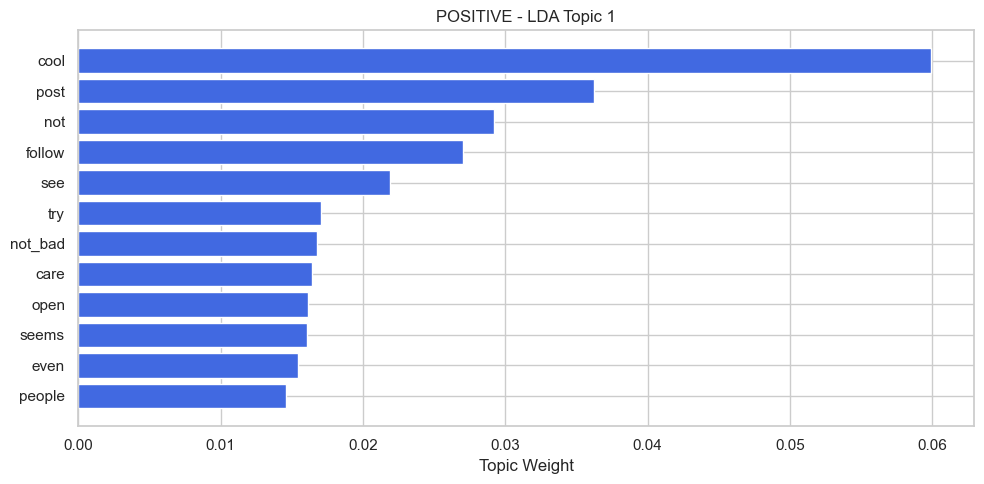

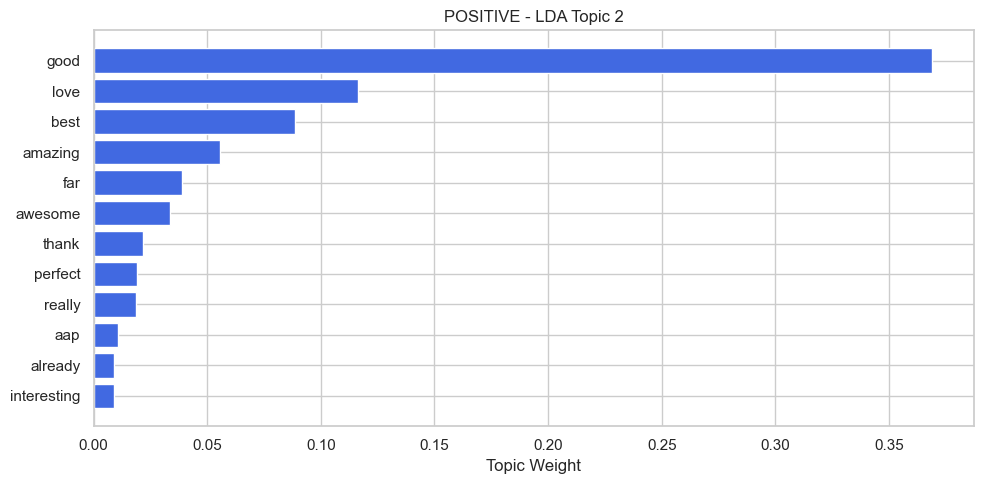

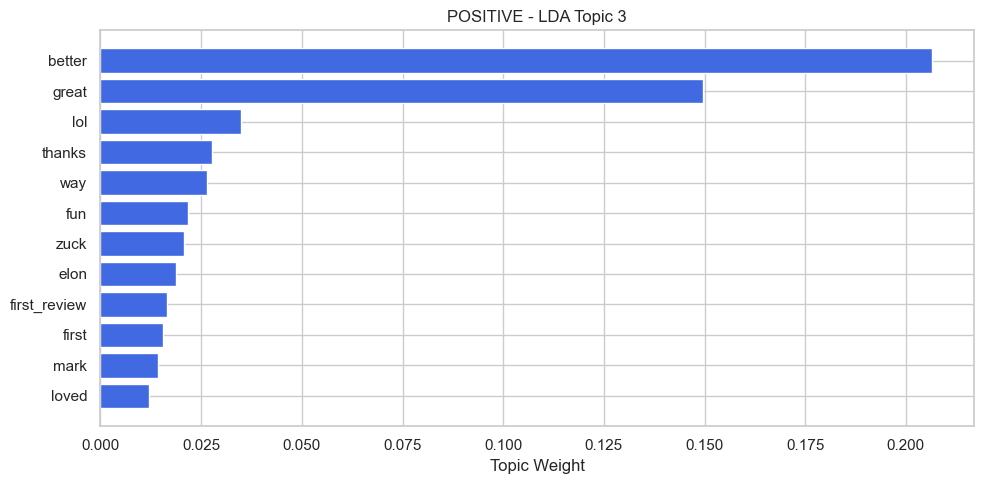

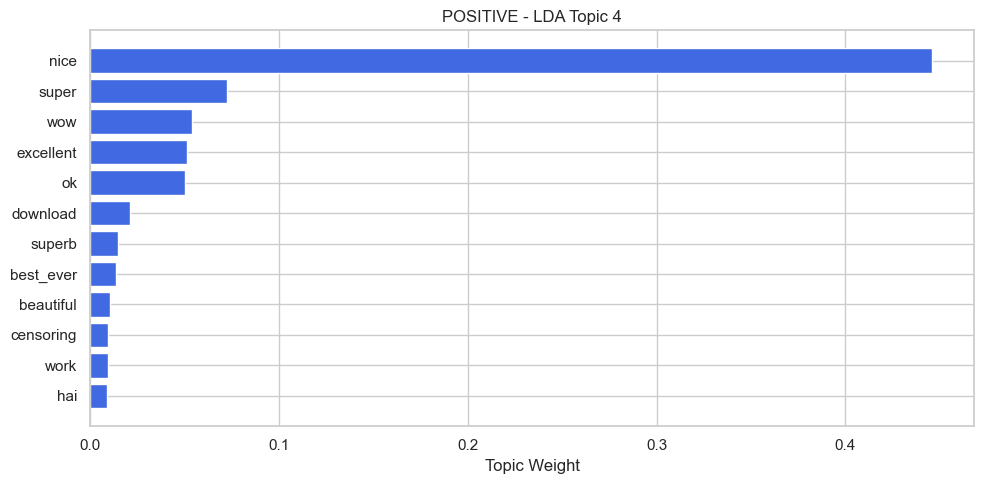

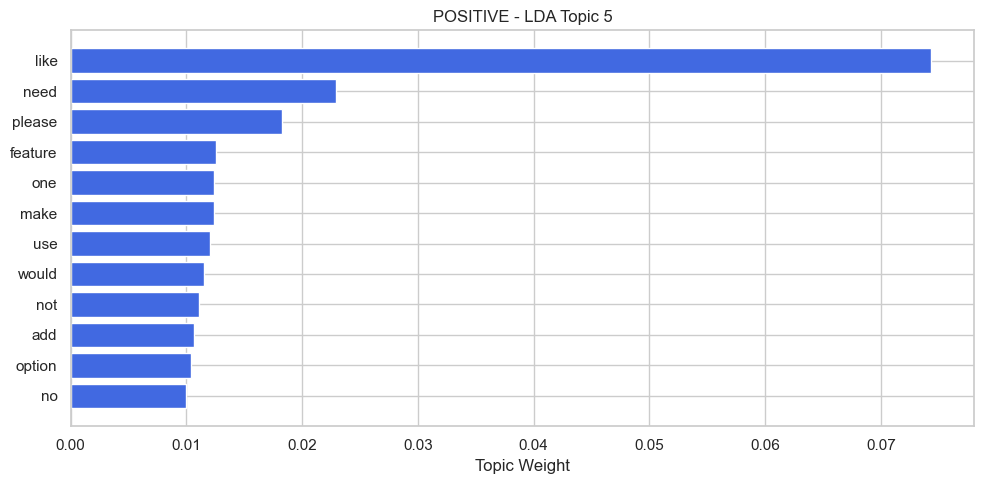


--- VISUALIZING LDA TOPICS: NEUTRAL ---


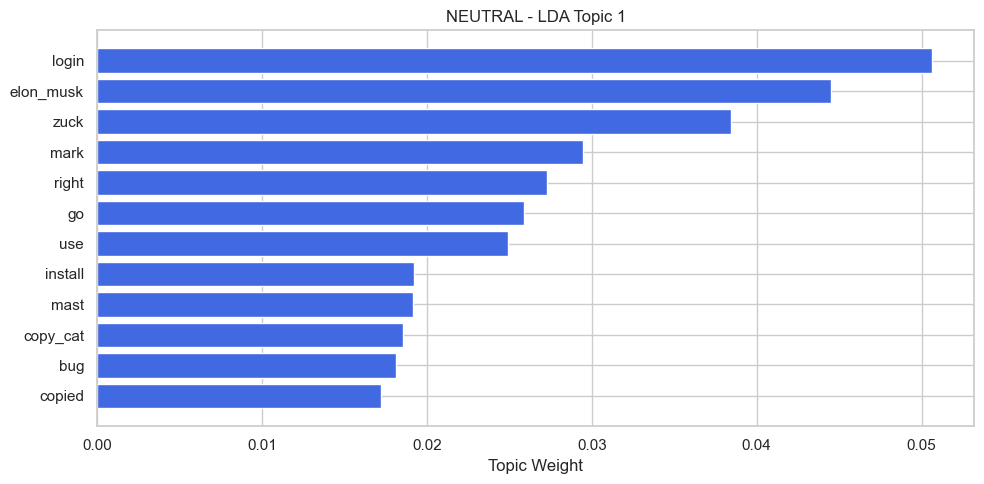

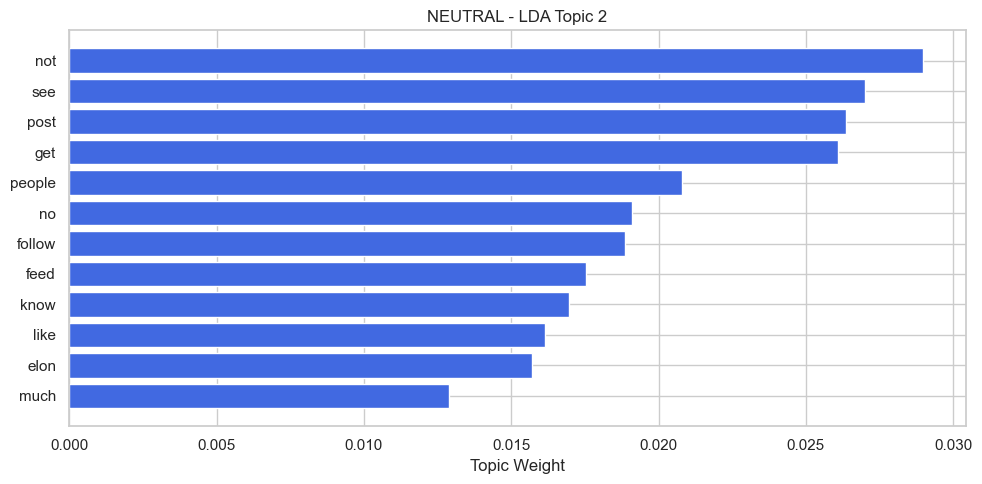

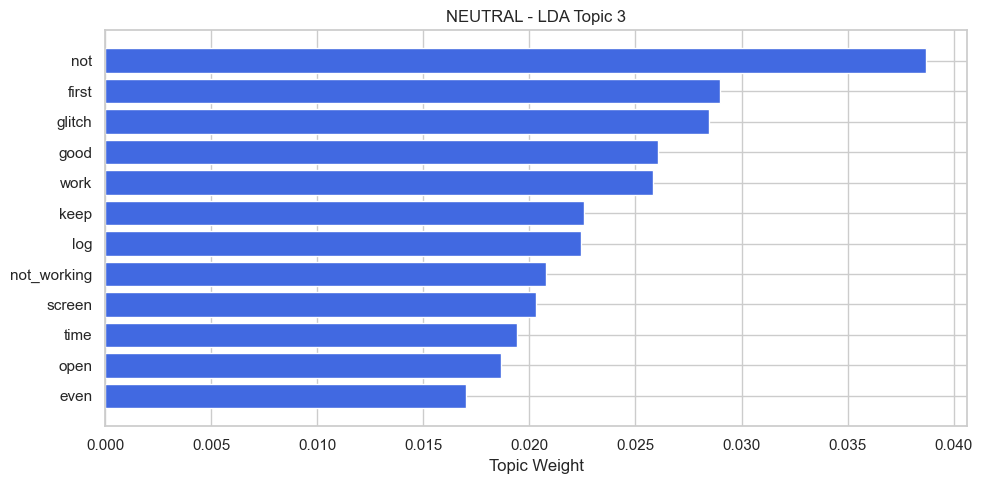

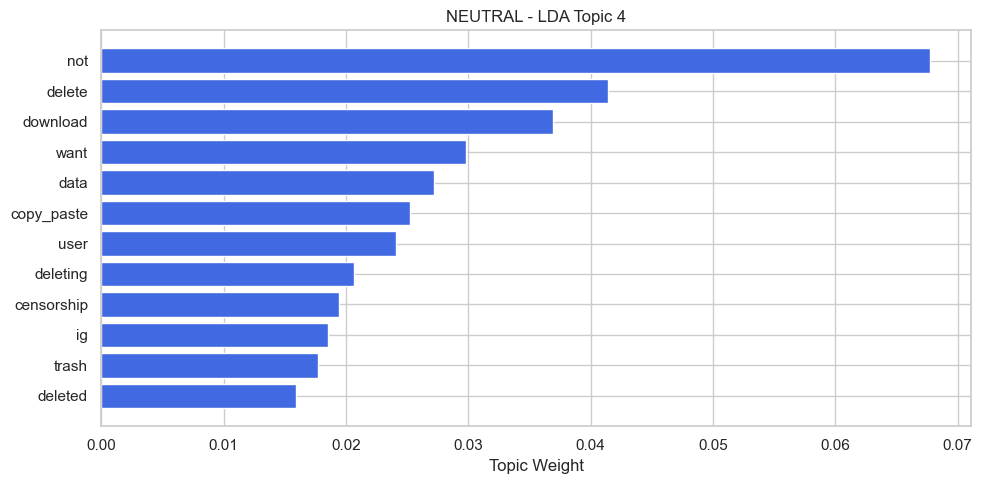

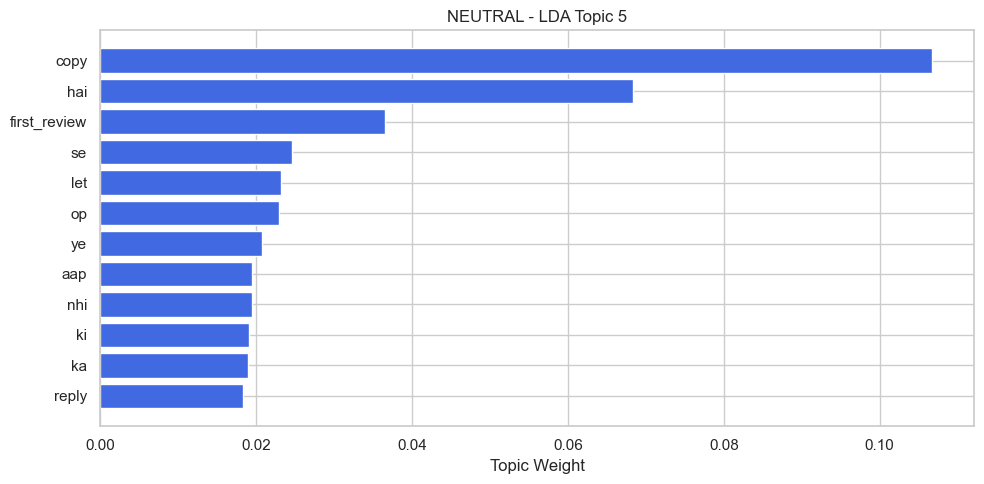

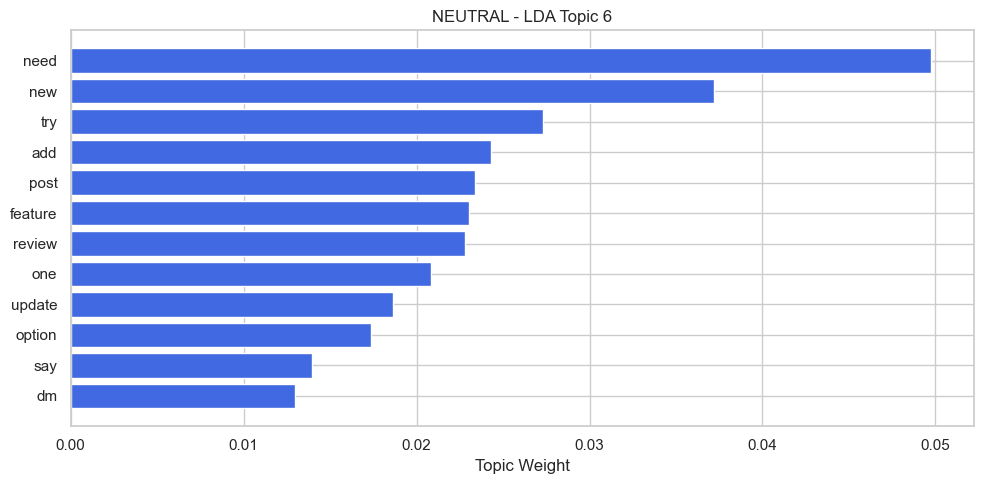


--- VISUALIZING LDA TOPICS: NEGATIVE ---


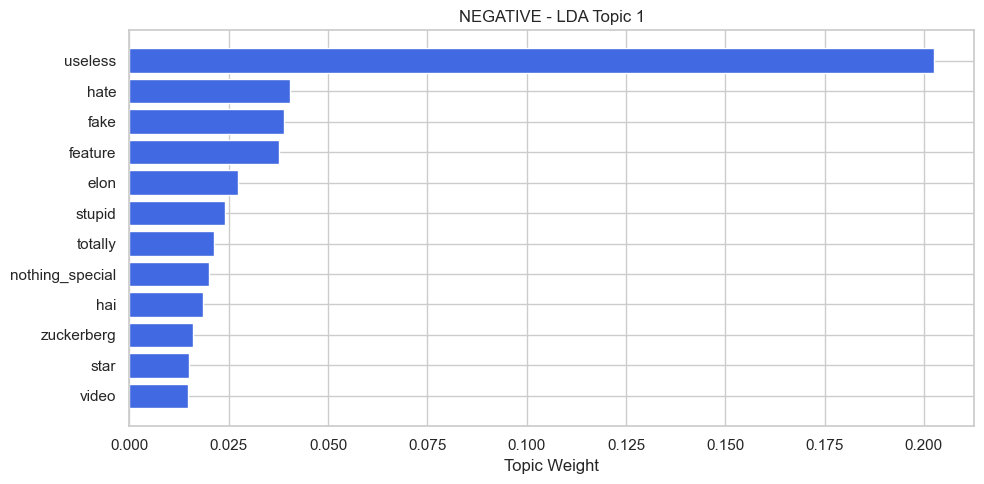

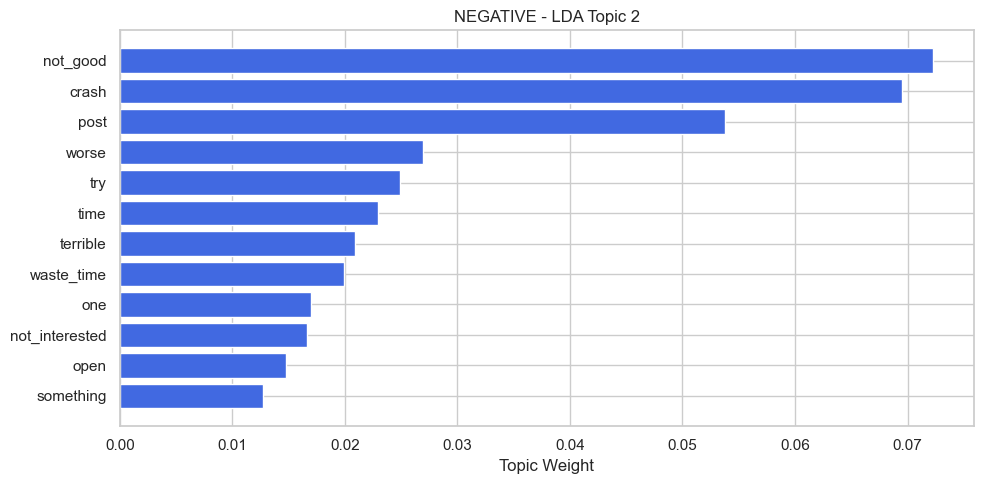

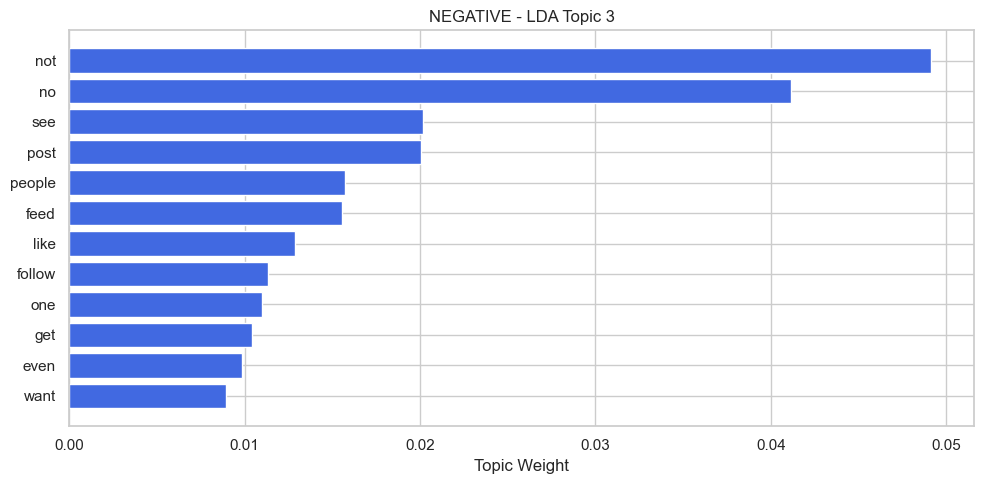

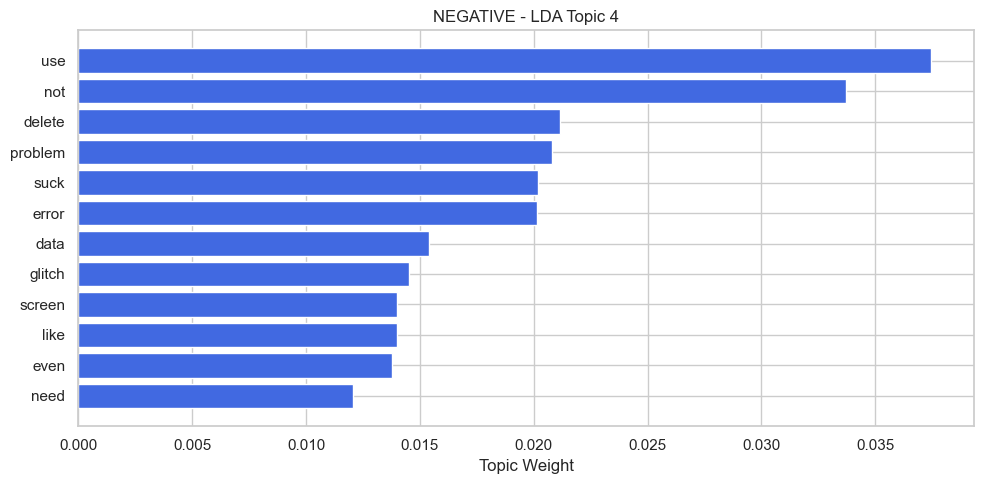

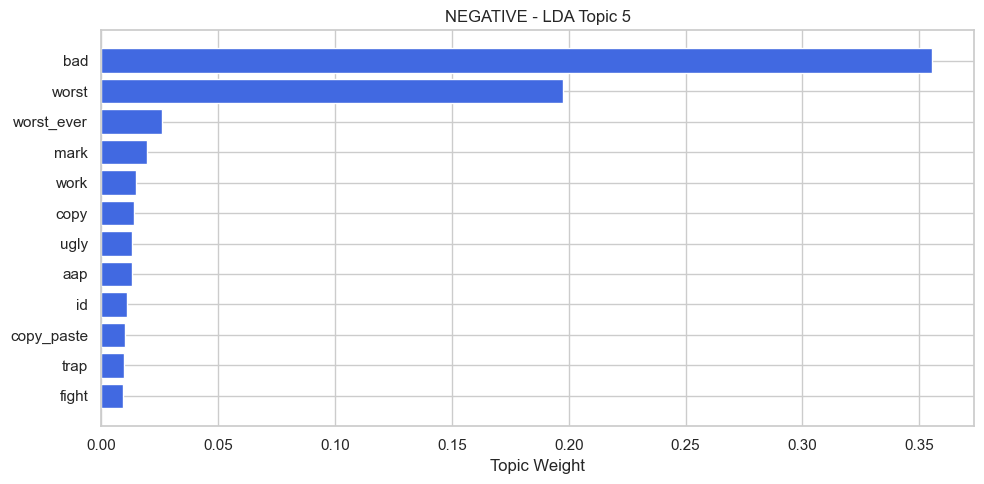

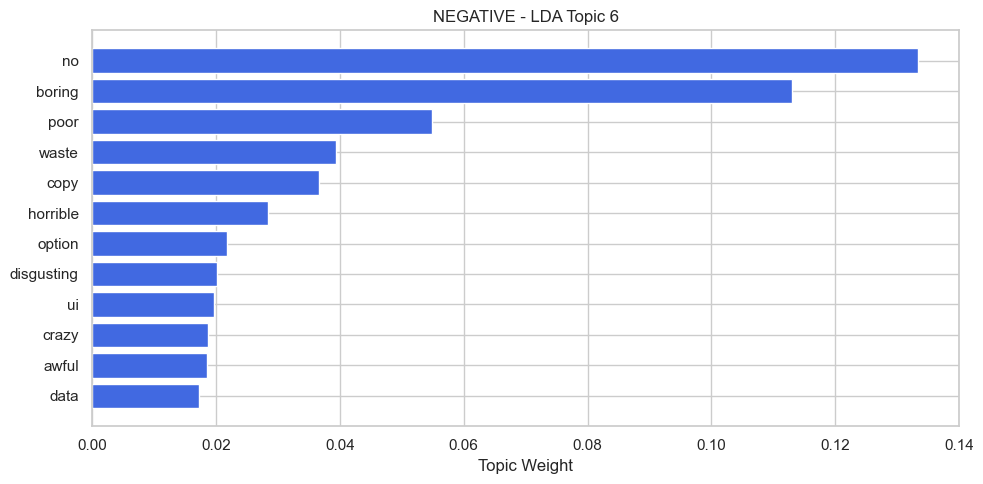

In [205]:
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Visualization helper
# ---------------------------------------------------------
def plot_lda_topic(words, weights, title):
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], weights[::-1], color='royalblue')
    plt.title(title)
    plt.xlabel("Topic Weight")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# Function to visualize topics for a trained LDA model
# ---------------------------------------------------------
def visualize_lda_topics(lda_model, sentiment_label, num_words=12):
    print(f"\n--- VISUALIZING LDA TOPICS: {sentiment_label.upper()} ---")

    topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)

    for topic_id, topic in topics:
        words = [w for w, wt in topic]
        weights = [wt for w, wt in topic]

        title = f"{sentiment_label.upper()} - LDA Topic {topic_id+1}"
        plot_lda_topic(words, weights, title)

# ---------------------------------------------------------
# Call this after you finish training lda_pos, lda_neu, lda_neg
# ---------------------------------------------------------

visualize_lda_topics(lda_pos, "Positive")
visualize_lda_topics(lda_neu, "Neutral")
visualize_lda_topics(lda_neg, "Negative")





### LDA does a pretty good job in capturing different insights of different topics in positive, negative and neutral sentiments with a great average coherence score of 0.50 efficiently 

## Topic Modelling 2 NMF (using sentiment - pos, neu, neg)

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

def run_nmf(docs_df):
    docs_bigrams = prepare_tm_texts(docs_df)
    docs_text = [" ".join(doc) for doc in docs_bigrams]

    tfidf_vectorizer = TfidfVectorizer(
        max_df=0.95,
        min_df=10,
        ngram_range=(1, 1),
    )

    tfidf = tfidf_vectorizer.fit_transform(docs_text)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    dictionary = Dictionary(docs_bigrams)
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    topic_range = range(3, 10)
    coherence_scores = {}

    for k in topic_range:
        nmf_model = NMF(
            n_components=k,
            random_state=42,
            init="nndsvda",
            max_iter=2000
        )
        
        W = nmf_model.fit_transform(tfidf)
        H = nmf_model.components_

        top_words = []
        for topic in H:
            idxs = topic.argsort()[-20:]
            top_words.append([feature_names[i] for i in idxs])

        coherence_model = CoherenceModel(
            topics=top_words,
            texts=docs_bigrams,
            dictionary=dictionary,
            coherence='c_v'
        )

        coherence = coherence_model.get_coherence()
        coherence_scores[k] = coherence
        print(f"k={k} Coherence={coherence:.4f}")

    best_k = max(coherence_scores, key=coherence_scores.get)
    print("\nBest number of NMF topics =", best_k)

    final_nmf = NMF(
        n_components=best_k,
        random_state=42,
        init="nndsvda",
        max_iter=400
    )

    W_final = final_nmf.fit_transform(tfidf)
    H_final = final_nmf.components_

    print("\n--- FINAL NMF TOPIC WORDS ---\n")
    for idx, topic in enumerate(H_final):
        indices = topic.argsort()[-15:]
        words = [feature_names[i] for i in indices]
        print(f"TOPIC {idx+1}: {', '.join(words)}")

    return final_nmf, feature_names



print("\n===== NMF THREADS POSITIVE =====")
nmf_pos, pos_feats = run_nmf(threads_pos)

print("\n===== NMF THREADS NEUTRAL =====")
nmf_neu, neu_feats = run_nmf(threads_neu)

print("\n===== NMF THREADS NEGATIVE =====")
nmf_neg, neg_feats = run_nmf(threads_neg)




===== NMF THREADS POSITIVE =====
k=3 Coherence=0.4699
k=4 Coherence=0.5260
k=5 Coherence=0.5229
k=6 Coherence=0.5355
k=7 Coherence=0.5317
k=8 Coherence=0.4861
k=9 Coherence=0.4832

Best number of NMF topics = 6

--- FINAL NMF TOPIC WORDS ---

TOPIC 1: look, work, new, pretty, think, feature, use, aap, need, job, really, like, one, far, good
TOPIC 2: thanks, interface, download, ui, see, platform, feature, new, work, really, one, wow, like, aap, nice
TOPIC 3: hope, tweeter, could, make, not, would, still, elon, elon_musk, feature, think, like, far, way, better
TOPIC 4: copy, alternative, new, social, think, use, feature, far, world, aap, platform, like, social_medium, one, best
TOPIC 5: look, think, one, would, not, job, new, start, alternative, really, need, feature, far, like, great
TOPIC 6: awesome, post, need, would, cool, much, feature, new, super, far, really, wow, like, love, amazing

===== NMF THREADS NEUTRAL =====
k=3 Coherence=0.4642
k=4 Coherence=0.4640
k=5 Coherence=0.5237



So the final insights for **NMF topic modelling** and topics for different sentiments could be categorised as:

---

**Positive Sentiment Analysis** with a coherence score of **k=6 Coherence=0.5355**


**1. General Impressions & Usability** — *look, work, new, pretty, think, feature, use, need, job*  
Users’ general impressions about the app and how they use basic features.

**2. UI Appreciation & Feature Praise** — *thanks, interface, download, ui, platform, wow, nice*  
Focused appreciation for the interface, design, and available features.

**3. Comparison With Twitter / Elon Musk** — *hope, tweeter, could, elon, elon_musk, feature, better*  
Mentions of Twitter, Elon Musk, and perceived improvements or differences.

**4. Social Platform Comparison / Alternatives** — *copy, alternative, social, world, platform, best*  
Observations about Threads as an alternative to other social platforms.

**5. New App Potential & Improvements** — *look, think, job, start, alternative, really, great*  
Users noting potential improvements and new opportunities in the app.

**6. Excitement & Enthusiasm** — *awesome, cool, super, wow, love, amazing*  
Strong positive emotions and excitement towards the app and its features.

**Insight:** Positive users appreciate the app’s interface and features, but they also notice potential improvements and compare Threads with other platforms.

---

**Neutral Sentiment Analysis** with a coherence score of **k=5 Coherence=0.5237**

**1. Commentary on Elon/Zuckerberg Rivalry** — *trash, absolute, elon_musk, mark, zuck, copy*  
Neutral discussions mentioning key figures and platform comparisons without strong opinions.

**2. Install / Login / Delete Actions** — *download, delete, login, opening, even, work*  
Technical actions users perform while using the app, reported neutrally.

**3. Basic App Usage & Navigation** — *follow, login, want, post, new, use*  
Descriptive mentions of navigating and using the platform.

**4. Cloning / Similarity Observations** — *zuck, clone, copy_cat, idea, copy_paste*  
Observations about similarities with other platforms.

**5. Neutral Mentions of Bugs / Glitches** — *scroll, glitching, bug, not_working, fix*  
Reports of minor technical issues without emotional tone.

**Insight:** Neutral users provide informative feedback, revealing technical behaviors, minor issues, and observations about platform similarities.

---

**Negative Sentiment Analysis** with a coherence score of **k=8 Coherence=0.4115**

**1. Poor Performance & UI Issues** — *poor, glitch, interface, copy, bad*  
Complaints about app performance, glitches, and UI issues.

**2. Privacy Concerns & App Worthlessness** — *social, privacy, waste_time, worst, copy*  
Critiques focused on privacy concerns and perceived lack of value.

**3. Strong Negative Criticism / Frustration** — *pathetic, stupid, useless, totally, waste_time*  
Frustrated users expressing strong negative sentiment about the app.

**4. Missing Features & Privacy Options** — *data, free_speech, privacy, no option*  
Negative mentions of missing features or privacy-related limitations.

**5. Low-Quality Copying / Bad Design** — *copying, cheap, interface, not_good*  
Criticism of design, copying behavior, and low-quality implementation.

**6. Unoriginal / Boring App Version** — *nothing_new, poor, boring, version*  
Negative reactions to unoriginal or boring aspects of the app.

**7. Negative Feed/User Experience** — *user, feed, delete, want, not*  
Complaints about feed, content visibility, and overall user experience.

**8. Crashes & Reliability Problems** — *problem, crash, everytime, upload, open*  
Frustration regarding app crashes and reliability issues.

**Insight:** Negative users have legitimate grievances—bugs, crashes, privacy concerns, and weak user experience—not just complaints.


### Visulaizing the Topics in pos, neu, neg (NMF)


--- VISUALIZING NMF TOPICS: POSITIVE ---


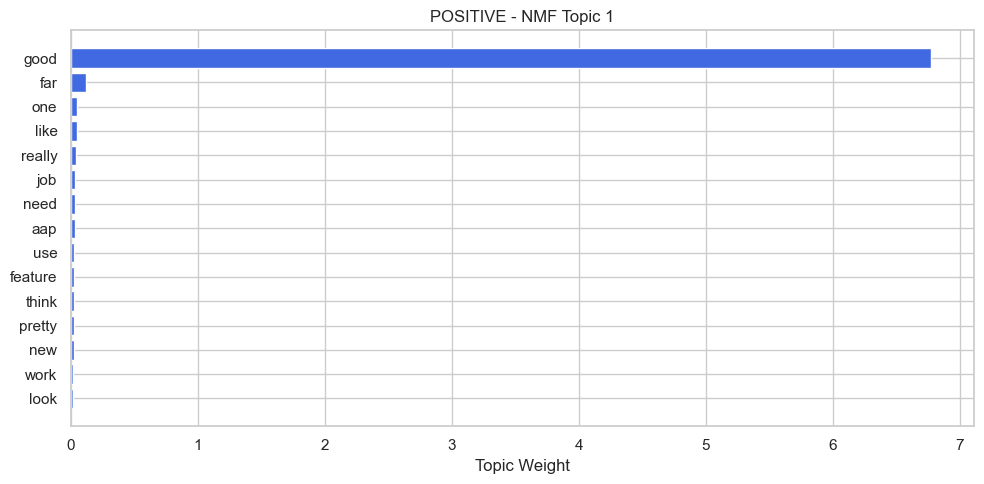

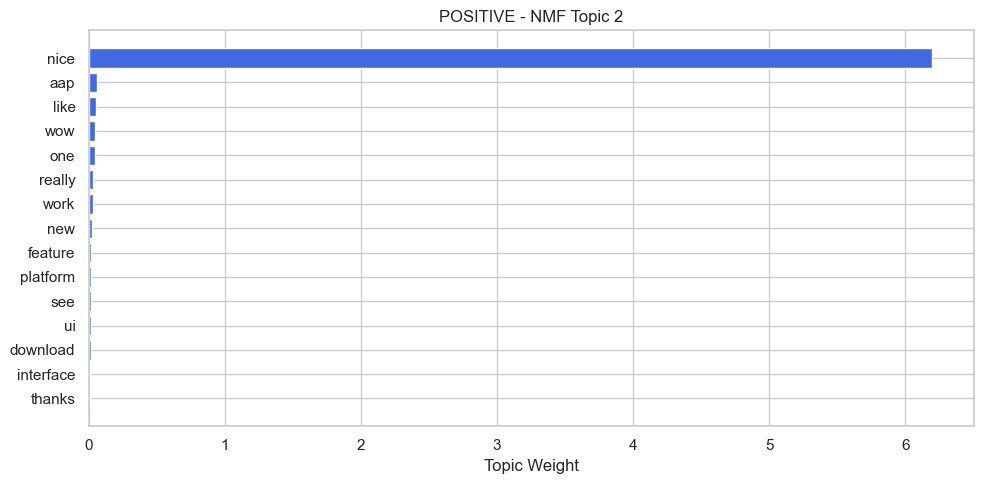

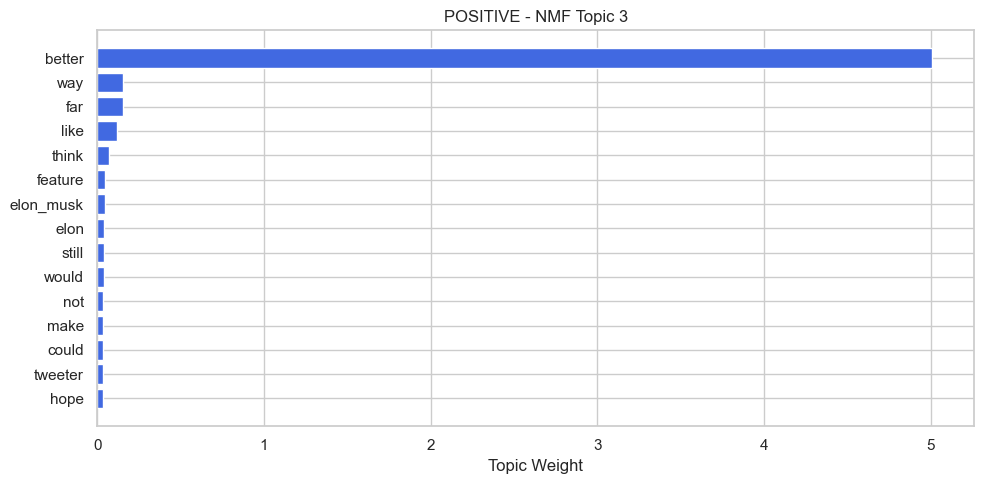

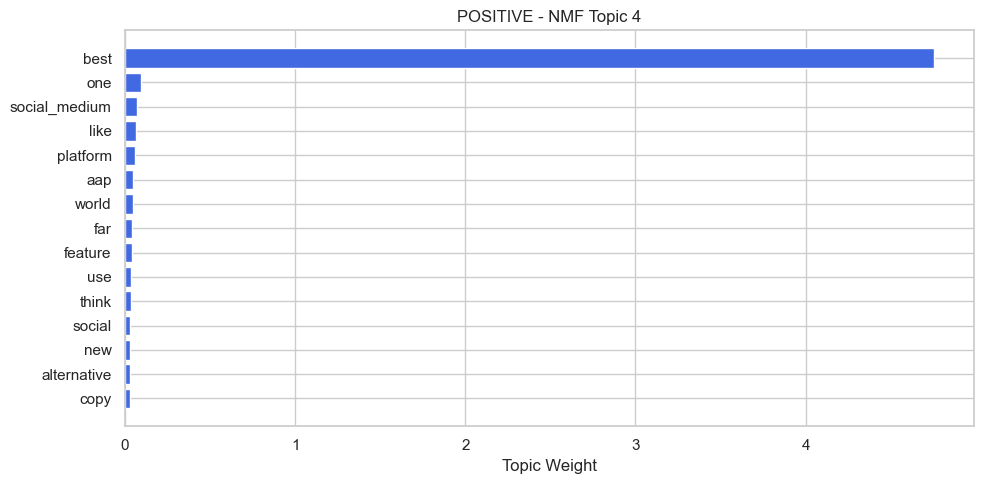

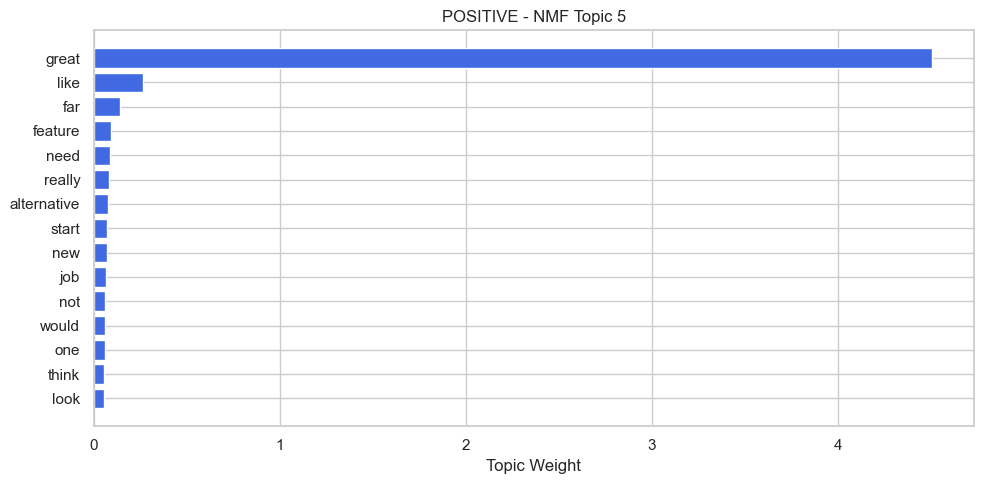

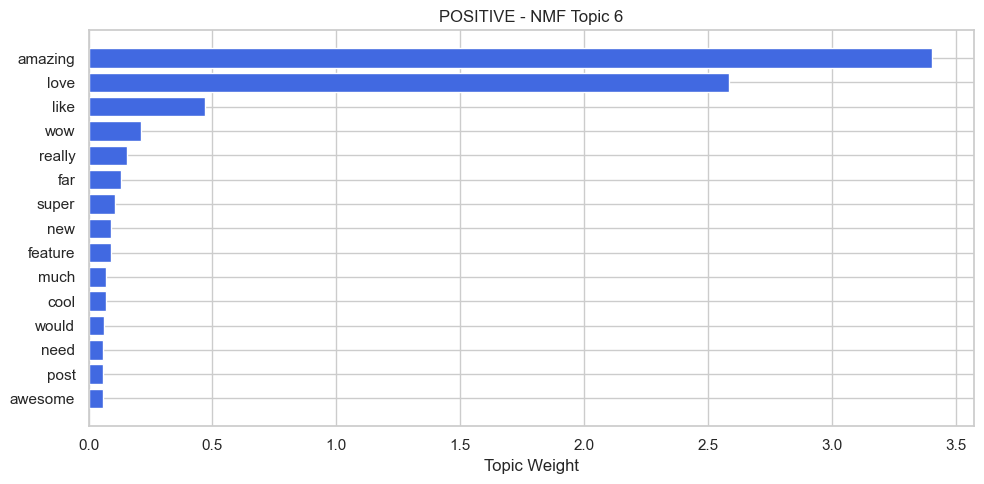


--- VISUALIZING NMF TOPICS: NEUTRAL ---


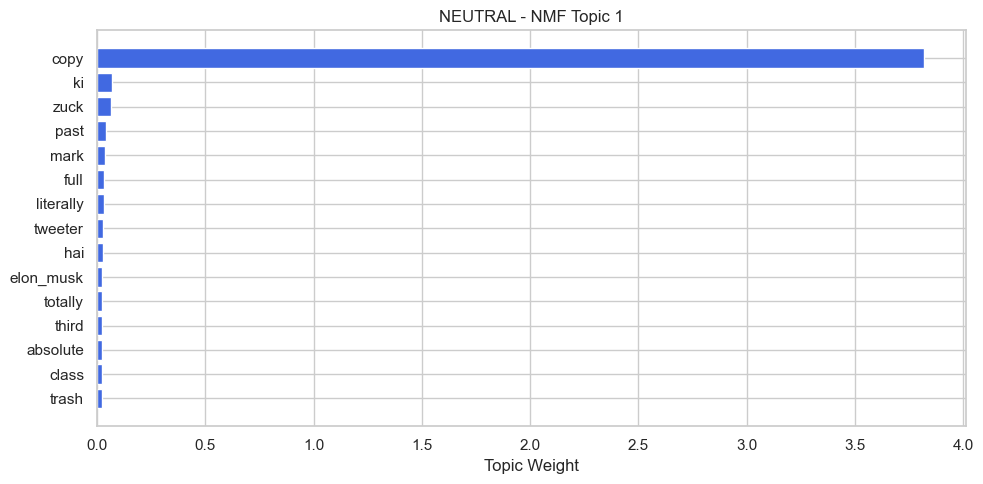

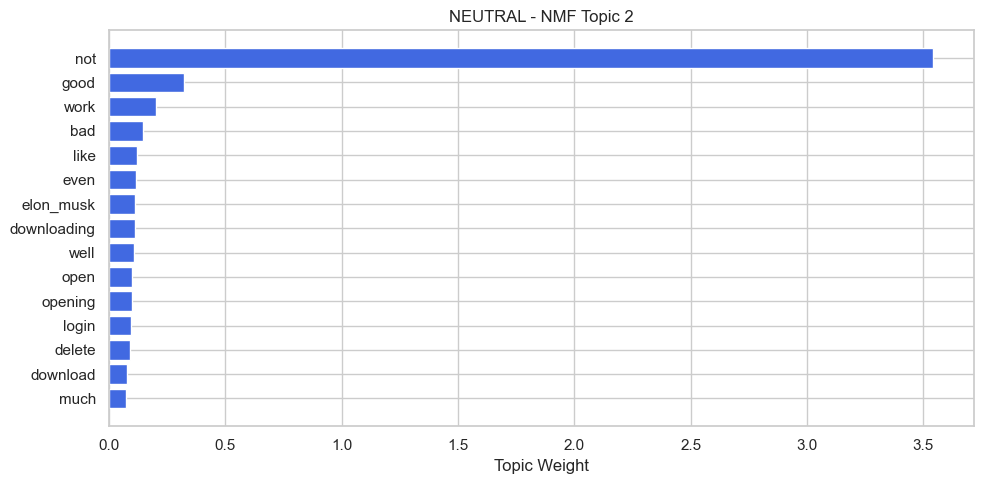

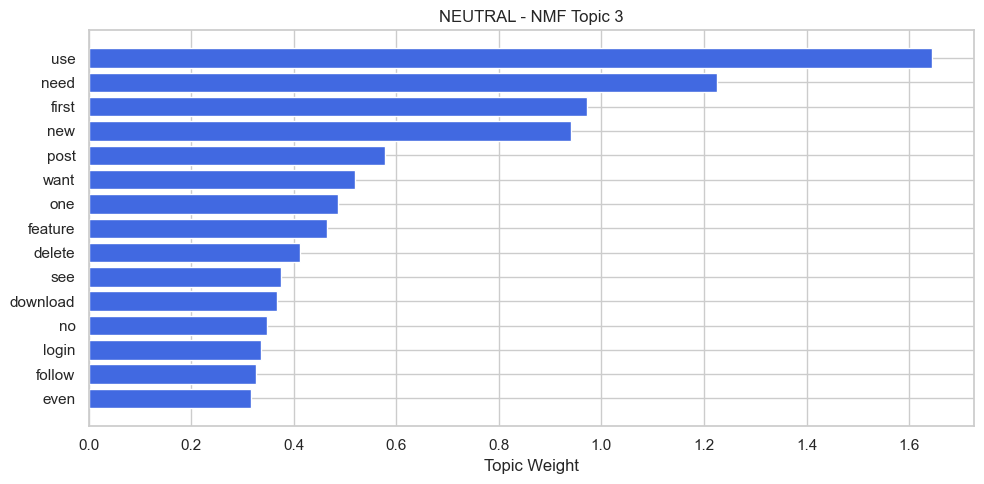

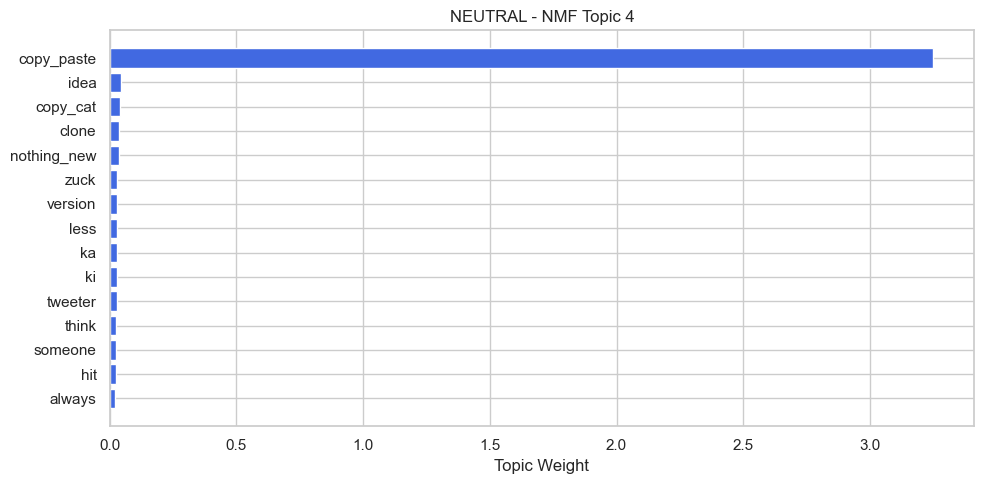

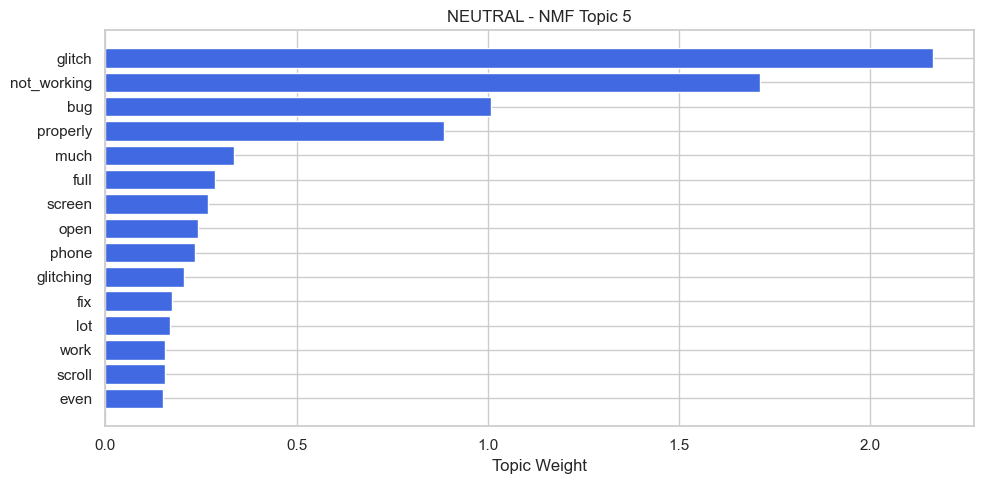


--- VISUALIZING NMF TOPICS: NEGATIVE ---


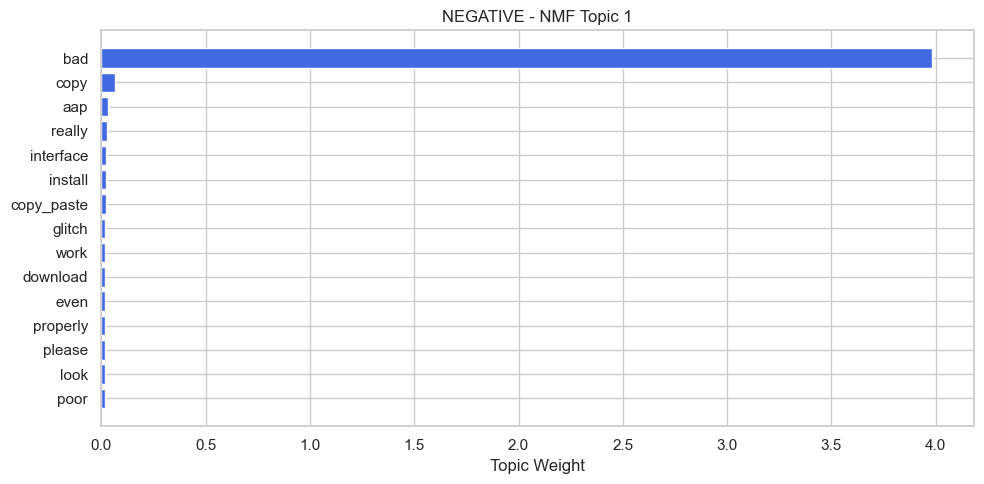

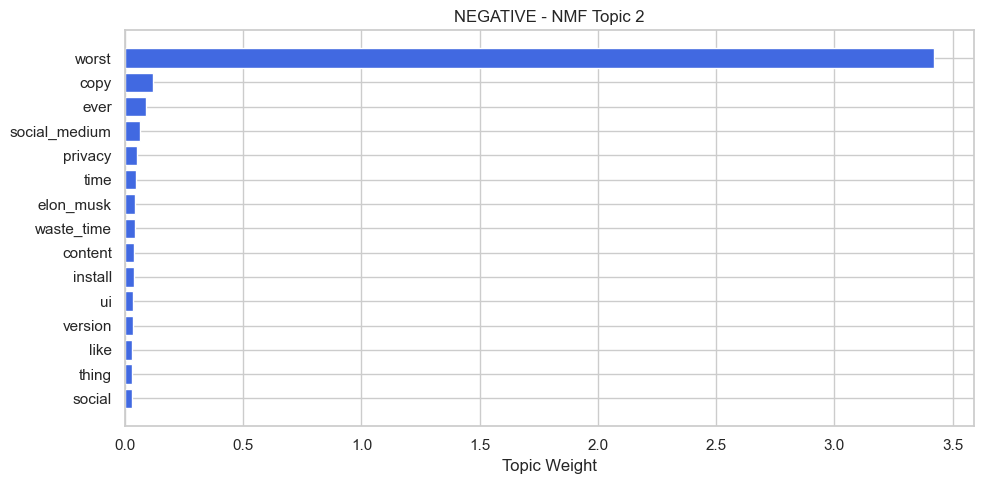

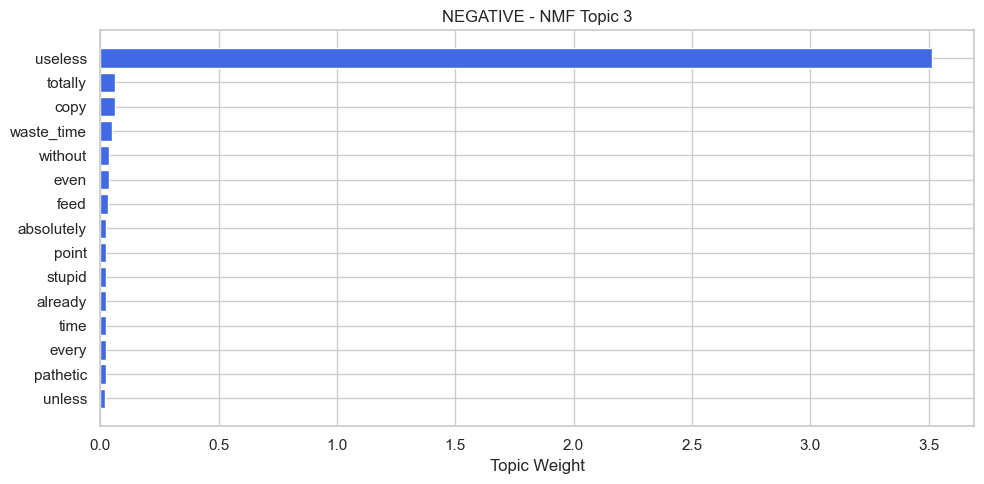

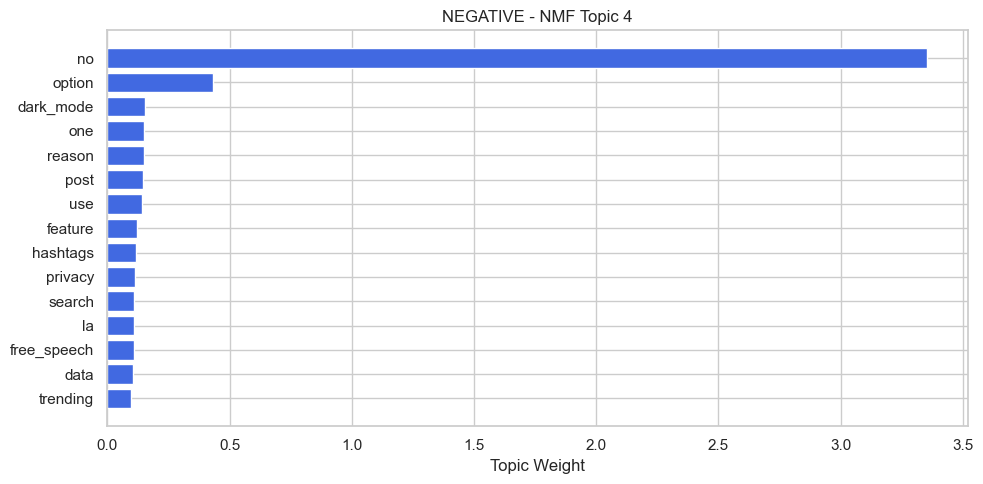

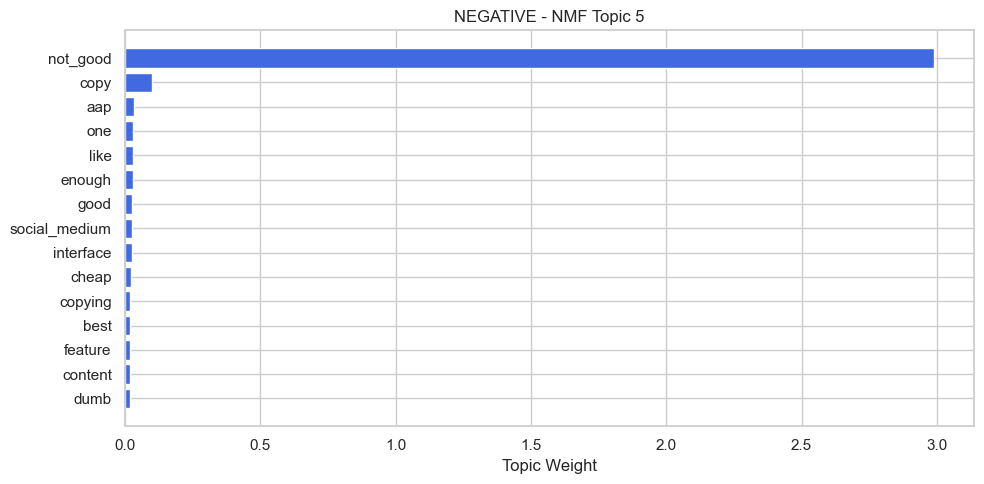

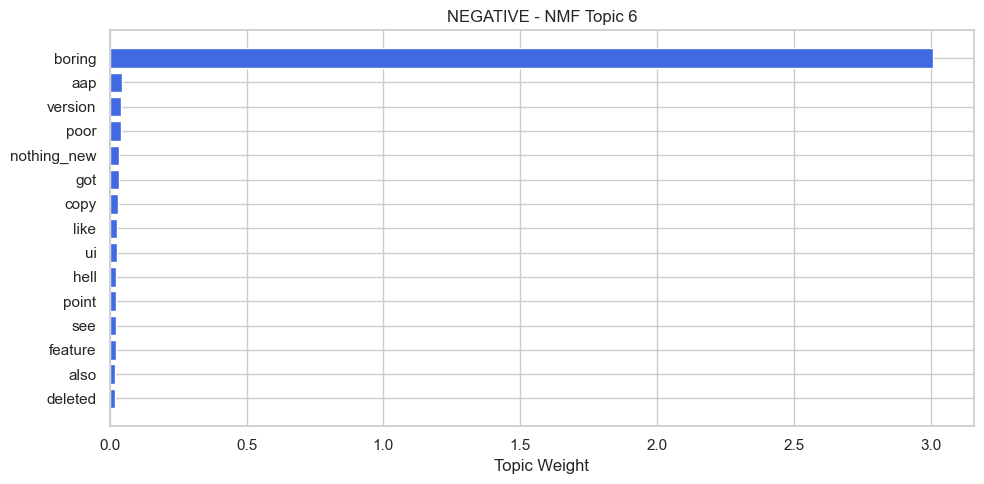

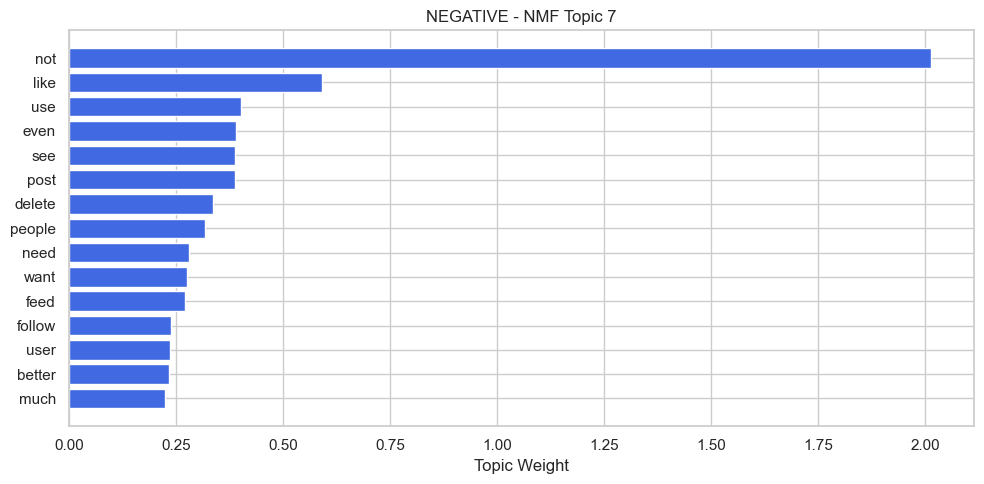

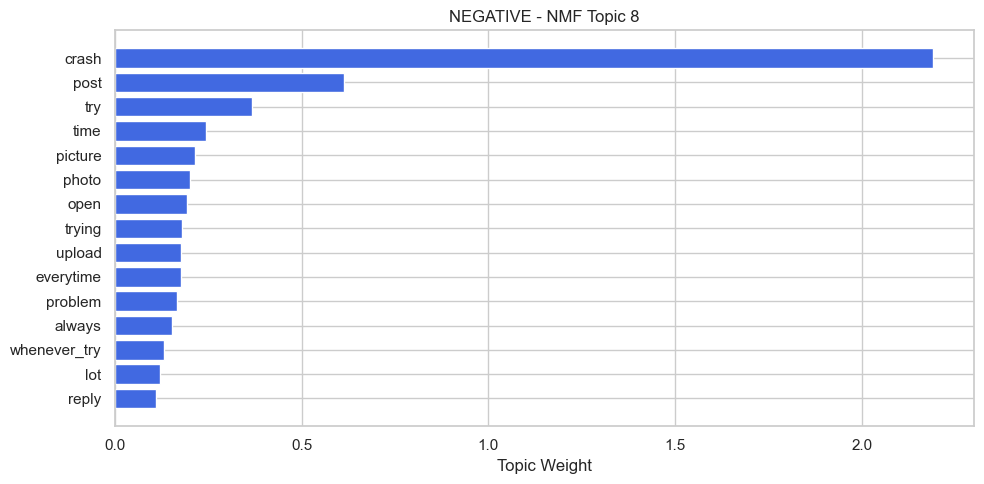

In [210]:
import matplotlib.pyplot as plt

def plot_topic(words, weights, title):
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], weights[::-1], color='royalblue')
    plt.title(title)
    plt.xlabel("Topic Weight")
    plt.tight_layout()
    plt.show()

def visualize_nmf_topics(nmf_model, feature_names, sentiment_label):
    print(f"\n--- VISUALIZING NMF TOPICS: {sentiment_label.upper()} ---")
    
    H = nmf_model.components_

    for idx, topic in enumerate(H):
        top_idx = topic.argsort()[-15:][::-1]
        words = [feature_names[i] for i in top_idx]
        weights = [topic[i] for i in top_idx]

        title = f"{sentiment_label.upper()} - NMF Topic {idx+1}"
        plot_topic(words, weights, title)


visualize_nmf_topics(nmf_pos, pos_feats, "Positive")
visualize_nmf_topics(nmf_neu, neu_feats, "Neutral")
visualize_nmf_topics(nmf_neg, neg_feats, "Negative")


### Though NMF and LDA find similar insights from the sentiments, the negative coherence score for NMF is too low making it on an average less effective than LDA . But overall it gives a good decomposition of the topics from the document.

## BERTopic 

In [260]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment splits
positive_df = df[df["sentiment"] == "positive"].copy()
neutral_df  = df[df["sentiment"] == "neutral"].copy()
negative_df = df[df["sentiment"] == "negative"].copy()

positive_texts = positive_df["review_description"].tolist()
neutral_texts  = neutral_df["review_description"].tolist()
negative_texts = negative_df["review_description"].tolist()

print("Counts:", len(positive_texts), len(neutral_texts), len(negative_texts))

# Embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def run_bertopic(texts, min_topic_size=20):
    embeddings = embedding_model.encode(texts, show_progress_bar=True)
    model = BERTopic(
        language="english",
        umap_model=None,
        min_topic_size=min_topic_size,
        top_n_words=15,
        calculate_probabilities=True,
        verbose=True
    )
    topics, probs = model.fit_transform(texts, embeddings)
    return model, topics, probs, embeddings

print("Running BERTopic on positive reviews...")
pos_model, pos_topics5, pos_probs5, pos_embeddings = run_bertopic(positive_texts, min_topic_size=20)

print("Running BERTopic on neutral reviews...")
neu_model, neu_topics5, neu_probs5, neu_embeddings = run_bertopic(neutral_texts, min_topic_size=20)

print("Running BERTopic on negative reviews...")
neg_model, neg_topics5, neg_probs5, neg_embeddings = run_bertopic(negative_texts, min_topic_size=20)

positive_df["topic5"] = pos_topics5
neutral_df["topic5"]  = neu_topics5
negative_df["topic5"] = neg_topics5


Counts: 16193 10427 4489
Running BERTopic on positive reviews...


Batches:   0%|          | 0/507 [00:00<?, ?it/s]

2025-11-25 18:34:48,402 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-25 18:34:59,552 - BERTopic - Dimensionality - Completed ✓
2025-11-25 18:34:59,578 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-25 18:36:13,584 - BERTopic - Cluster - Completed ✓
2025-11-25 18:36:13,604 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-25 18:36:14,492 - BERTopic - Representation - Completed ✓


Running BERTopic on neutral reviews...


Batches:   0%|          | 0/326 [00:00<?, ?it/s]

2025-11-25 18:37:20,699 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-25 18:37:25,666 - BERTopic - Dimensionality - Completed ✓
2025-11-25 18:37:25,671 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-25 18:37:44,058 - BERTopic - Cluster - Completed ✓
2025-11-25 18:37:44,072 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-25 18:37:44,692 - BERTopic - Representation - Completed ✓


Running BERTopic on negative reviews...


Batches:   0%|          | 0/141 [00:00<?, ?it/s]

2025-11-25 18:38:19,046 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-25 18:38:22,932 - BERTopic - Dimensionality - Completed ✓
2025-11-25 18:38:22,934 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-25 18:38:24,739 - BERTopic - Cluster - Completed ✓
2025-11-25 18:38:24,752 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-25 18:38:25,097 - BERTopic - Representation - Completed ✓


In [261]:
# pos_model, pos_topics, pos_probs, pos_emb = run_bertopic(positive_texts)
# neu_model, neu_topics, neu_probs, neu_emb = run_bertopic(neutral_texts)
# neg_model, neg_topics, neg_probs, neg_emb = run_bertopic(negative_texts)

def reduce_to_5(model, texts, embeddings):
    reduced_model = model.reduce_topics(texts, nr_topics=5)
    new_topics, new_probs = reduced_model.transform(texts, embeddings)
    return reduced_model, new_topics, new_probs

pos_model5, pos_topics5, pos_probs5 = reduce_to_5(pos_model, positive_texts, pos_embeddings)
neu_model5, neu_topics5, neu_probs5 = reduce_to_5(neu_model, neutral_texts, neu_embeddings)
neg_model5, neg_topics5, neg_probs5 = reduce_to_5(neg_model, negative_texts, neg_embeddings)


2025-11-25 18:38:25,627 - BERTopic - Topic reduction - Reducing number of topics
2025-11-25 18:38:25,812 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-25 18:38:26,294 - BERTopic - Representation - Completed ✓
2025-11-25 18:38:26,307 - BERTopic - Topic reduction - Reduced number of topics from 172 to 5
2025-11-25 18:38:26,447 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-11-25 18:38:26,550 - BERTopic - Dimensionality - Completed ✓
2025-11-25 18:38:26,552 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-11-25 18:38:28,712 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-11-25 18:39:48,325 - BERTopic - Probabilities - Completed ✓
2025-11-25 18:39:48,325 - BERTopic - Cluster - Completed ✓
2025-11-25 18:39:48,538 - BERTopic - Topic reduction - Reducing number of topics
2025-11-25 18:39:48,636 - BERTopic - Representation - Fine-tuning topics using representat

In [262]:
import matplotlib.pyplot as plt

def plot_topic(words, weights, title):
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], weights[::-1], color="royalblue")
    plt.title(title)
    plt.xlabel("Topic Weight")
    plt.tight_layout()
    plt.show()



In [263]:
def inspect_topics(model, df_sent, group_name):
    print(f"===== BERTOPIC SUMMARY ({group_name.upper()}) — 5 TOPICS =====")

    topic_info = model.get_topic_info()
    print(topic_info)

    print(f"\n--- TOP WORDS ({group_name}) ---")
    for tid in topic_info["Topic"]:
        if tid == -1:
            continue
        print(f"\nTopic {tid}:")
        print(model.get_topic(tid))

    # Topic distribution barplot
    plt.figure(figsize=(8,4))
    sns.barplot(x="Topic", y="Count", data=topic_info[topic_info["Topic"] != -1])
    plt.title(f"Topic Distribution ({group_name.capitalize()} Reviews)")
    plt.tight_layout()
    plt.show()

    for tid in topic_info["Topic"]:
        if tid == -1:
            continue

        words_scores = model.get_topic(tid)
        words = [w for (w, score) in words_scores]
        weights = [score for (w, score) in words_scores]

        plot_topic(words, weights, title=f"{group_name.upper()} - BERTopic {tid}")

    print(f"\n--- REPRESENTATIVE EXAMPLES ({group_name}) ---")
    repr_docs = model.get_representative_docs()
    for tid, docs in repr_docs.items():
        if tid == -1:
            continue
        print(f"\nTopic {tid} Examples:")
        for d in docs[:3]:
            print("-", d[:200], "...")


===== BERTOPIC SUMMARY (POSITIVE) — 5 TOPICS =====
   Topic  Count                             Name  \
0     -1   3837                -1_to_the_and_app   
1      0   7249                 0_app_to_the_and   
2      1   5056         1_good_nice_very_amazing   
3      2     31  2_copy_original_copycat_copying   
4      3     20                 3_dm_dms_add_but   

                                      Representation  \
0  [to, the, and, app, it, is, this, of, but, lik...   
1  [app, to, the, and, is, twitter, it, this, lik...   
2  [good, nice, very, amazing, super, best, so, l...   
3  [copy, original, copycat, copying, is, copyrig...   
4  [dm, dms, add, but, the, it, could, feature, t...   

                                 Representative_Docs  
0  [No point in getting this app if you want to u...  
1  [Got fed up with Twitter and decided to use Th...  
2                                 [Good, Good, Good]  
3  [Nice copy, Good copy, Copy is copy anyway , o...  
4  [I love the app so fa

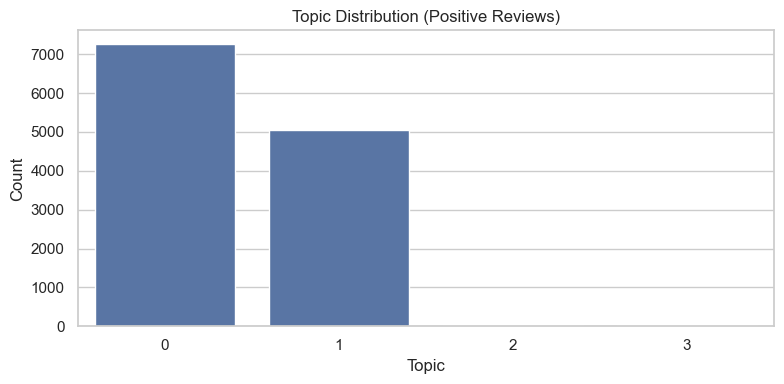

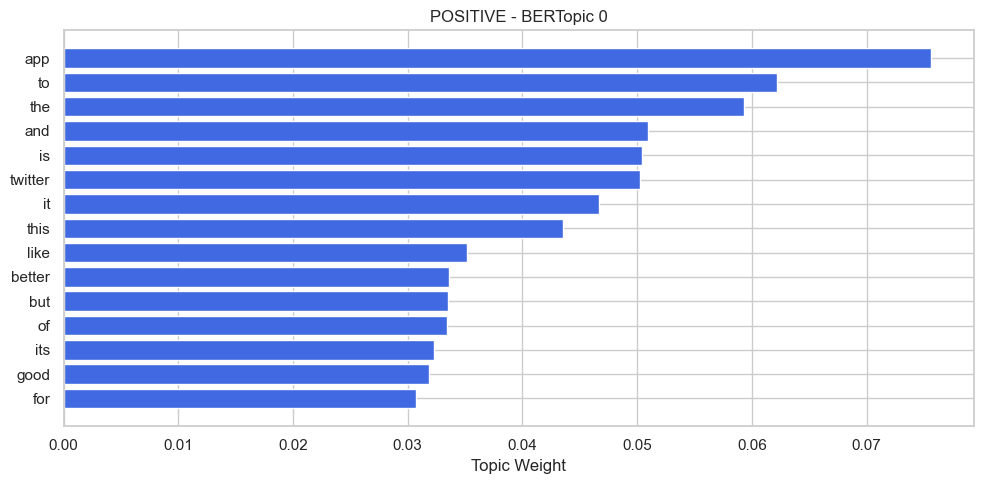

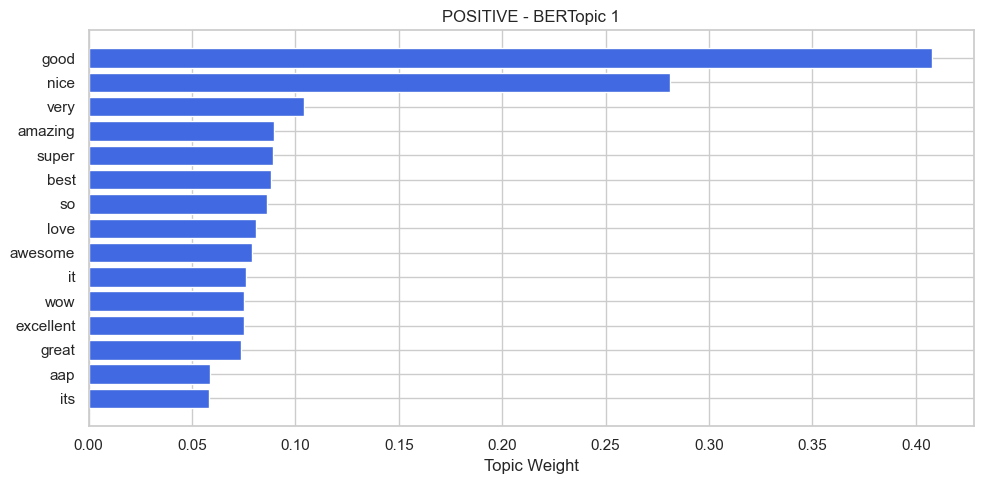

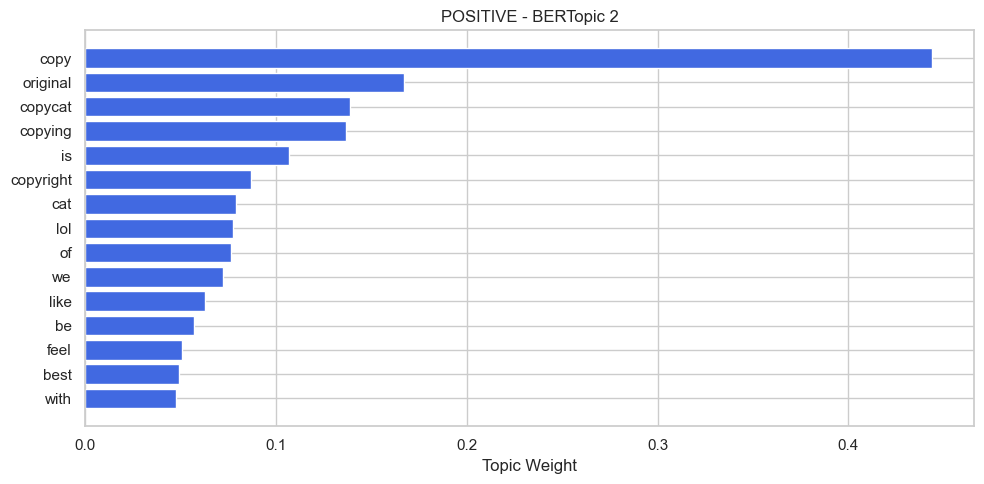

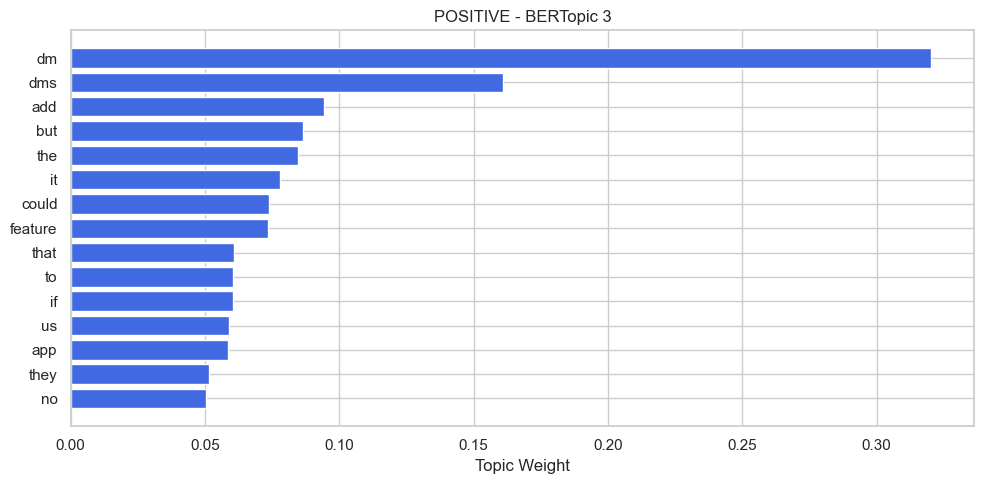


--- REPRESENTATIVE EXAMPLES (positive) ---

Topic 0 Examples:
- Got fed up with Twitter and decided to use Threads. I already have an account on insta so the sign-up process was smooth which is appreciated. If you’re familiar with how Twitter functions, Threads is ...
- Super app and instagram is very very good what will be very good threads now and there is no better app than this i do it a lot thank you Instagram ❤️☄️🎶🎧💌🌍🤞🏻 ...
- This app is like Twitter ...

Topic 1 Examples:
- Good ...
- Good ...
- Good ...

Topic 2 Examples:
- Nice copy ...
- Good copy ...
- Copy is copy anyway , original is always best ...

Topic 3 Examples:
- I love the app so far But they should please put the dm option for us ...
- Nice app👍🏽 But i think they should try to add DM too😋🥰 ...
- It would be better if it has a DM feature. ...
===== BERTOPIC SUMMARY (NEUTRAL) — 5 TOPICS =====
   Topic  Count                      Name  \
0     -1   3321         -1_the_to_app_and   
1      0   4448      0_to_the_app_

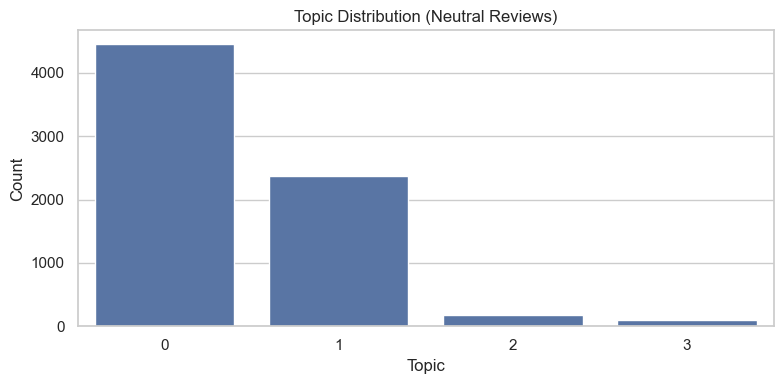

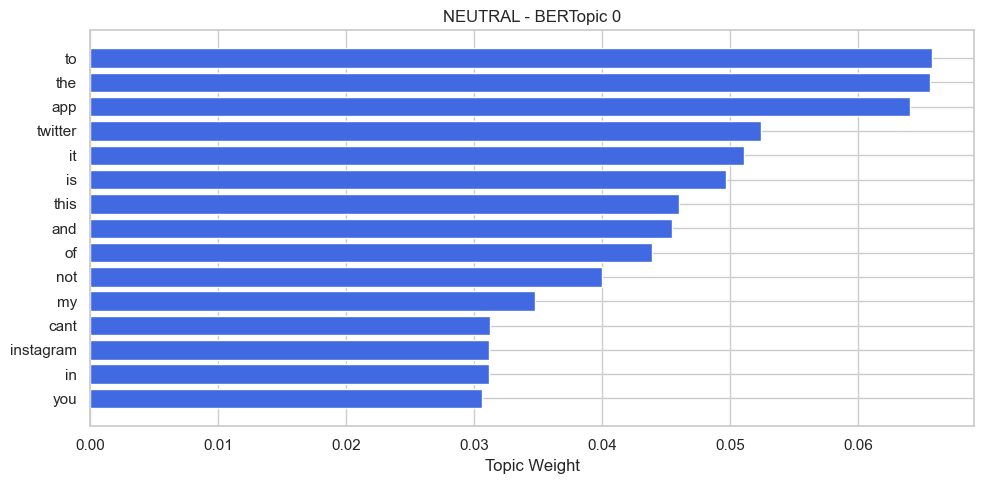

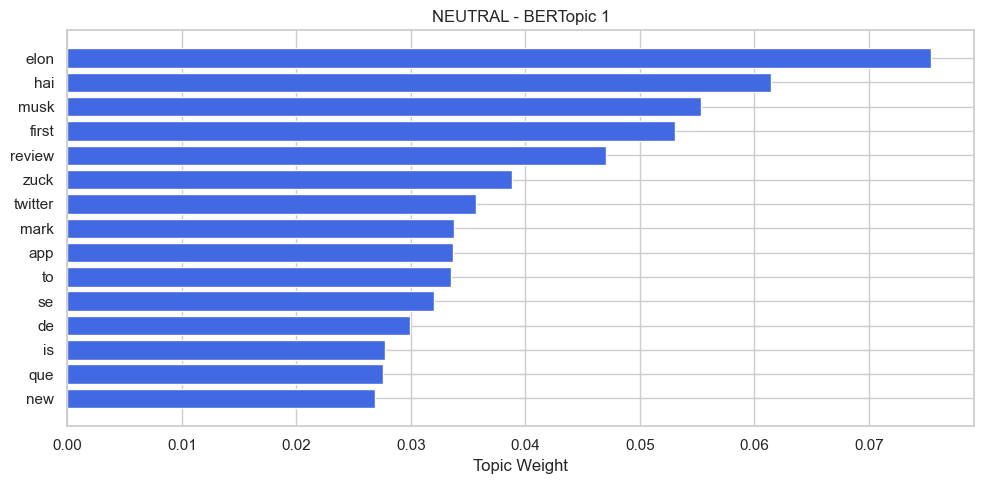

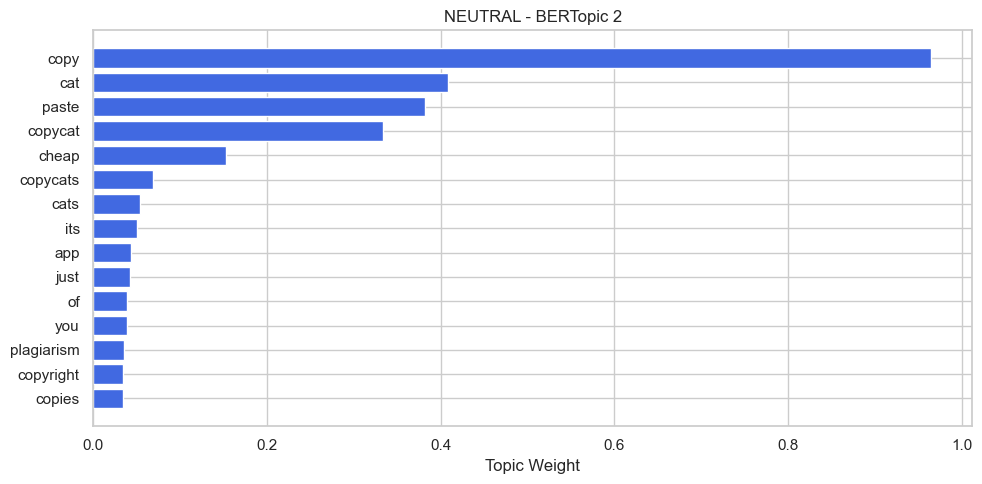

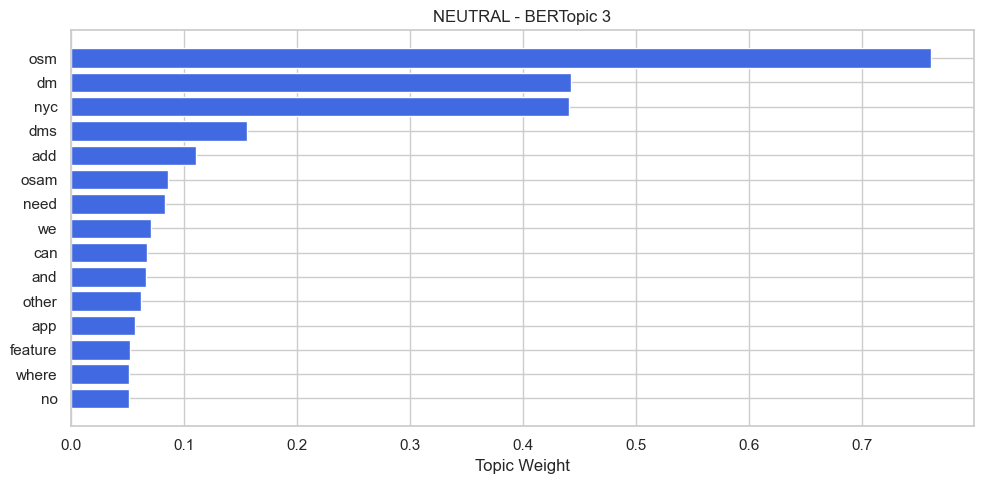


--- REPRESENTATIVE EXAMPLES (neutral) ---

Topic 0 Examples:
- this app is number one rubbish app because i created my id on this in office i am not able to see anything neither i am able to login my account nor i am getting to see some new interface in this full ...
- As a starter this is okay but there are two deal breakers. One is the feed. You get stuff from accounts you don't follow and have no interest in and it cannot be changed. Second, if you log in with in ...
- I downloaded this for the first time which is today, the problem is it keeps glitching... I already reinstalled this app 3 times and whenever I open it, it still glitch like the whole screen of thread ...

Topic 1 Examples:
- Elon Musk ...
- Is the app from Elon Musk? ...
- Elon Musk 😂 ...

Topic 2 Examples:
- Copy ...
- Copy ...
- Copy ...

Topic 3 Examples:
- Osm ...
- Osm ...
- Osm ...
===== BERTOPIC SUMMARY (NEGATIVE) — 5 TOPICS =====
   Topic  Count                   Name  \
0     -1   1090       -1_the_and_to_i

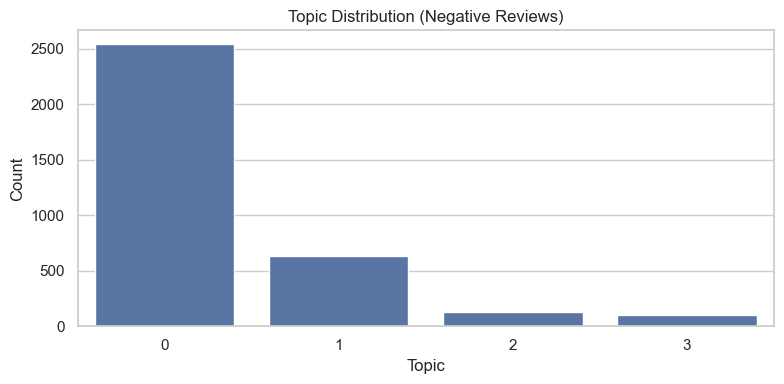

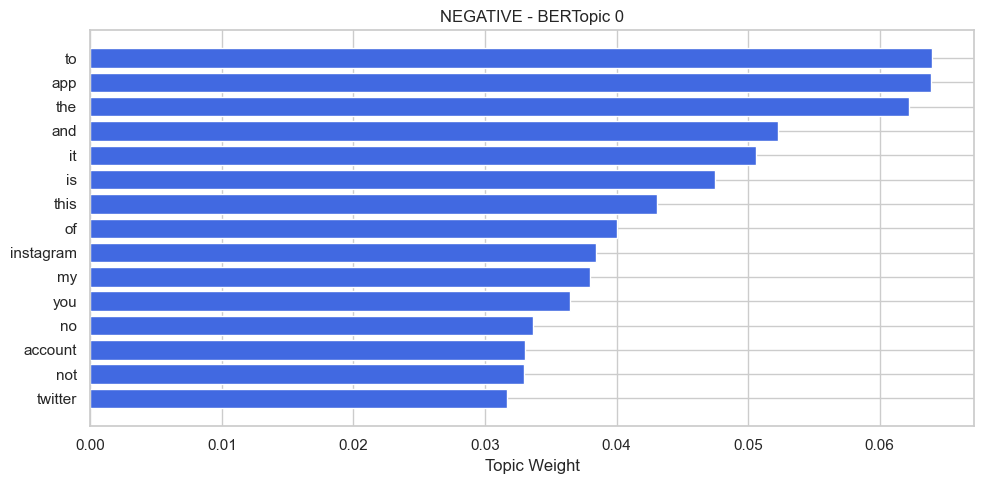

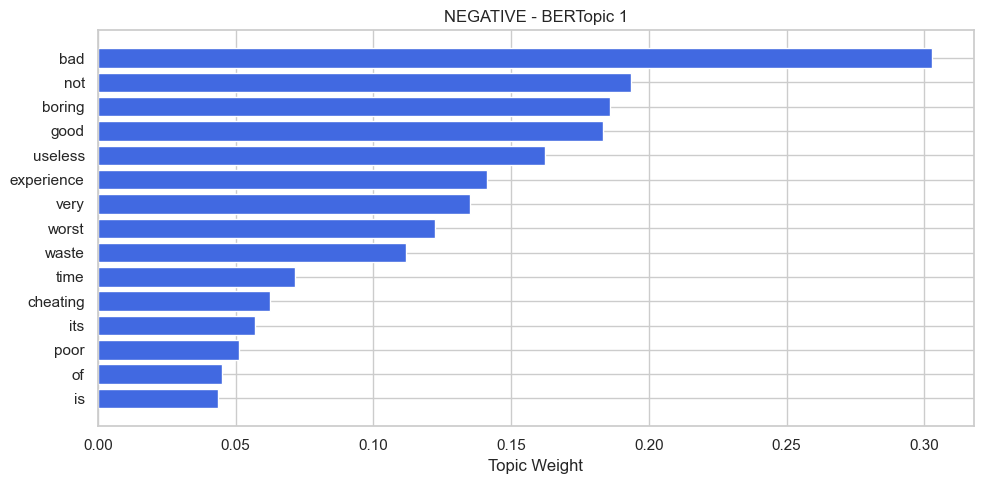

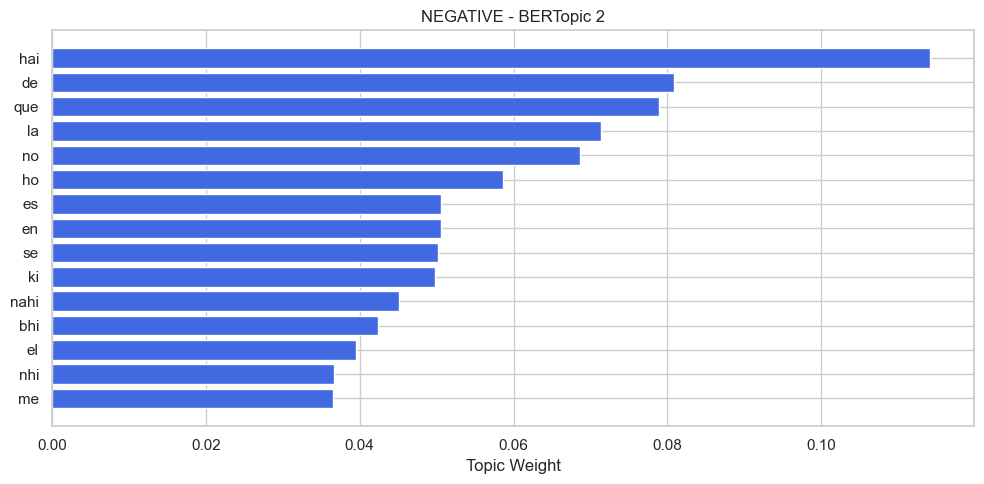

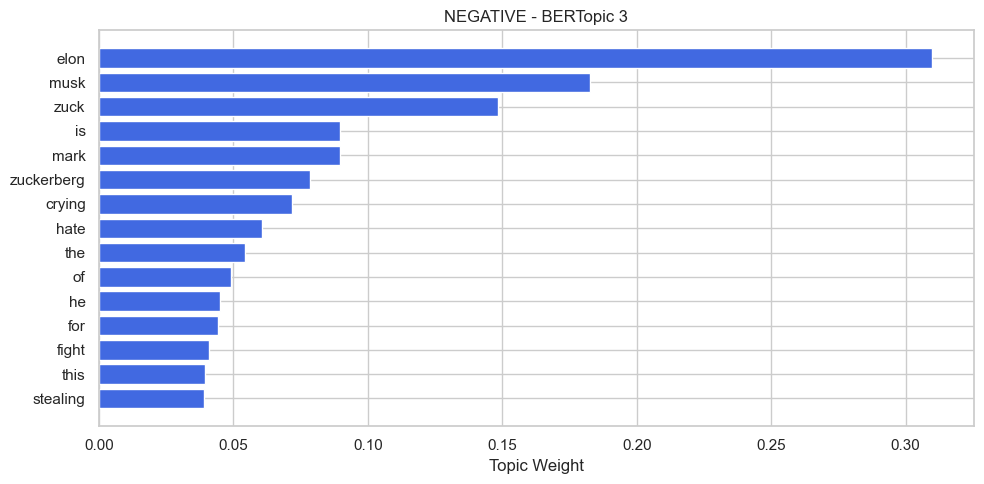


--- REPRESENTATIVE EXAMPLES (negative) ---

Topic 0 Examples:
- Don't download this app this app is block your real Instagram account this is the Bad app for you ...
- Trash, if you are looking to see a Twitter killer, Sorry to disappoint you. It's been 3hours, trying to post a Thread but it's been crashing, and it ignores the threads of those you are following and  ...
- I only put 5 stars so you could see don’t download this app because once you try to delete it it will delete your instagram too so there’s no way of getting rid of this app and if you try to deactivat ...

Topic 1 Examples:
- Very bad experience 🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮 ...
- Very bad experience 😑 ...
- Not good but not bad 💜 ...

Topic 2 Examples:
- Al principio bien, como todo, jajaja la tendencia puede con todo, pero la verdad llevo dos días intentando postear y no se ha podido, está fallando todo, que horror. Si es fácil de usar y es bonita, e ...
- Le falta las opción para poder eliminar las publicaciones en el muro de uno de

In [264]:
inspect_topics(pos_model5, positive_df, "positive")
inspect_topics(neu_model5, neutral_df, "neutral")
inspect_topics(neg_model5, negative_df, "negative")


In [265]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

def get_bertopic_top_words(model, top_n=15):
    topic_words = []
    for topic_num in model.get_topics().keys():
        if topic_num == -1:  # skip outlier topic
            continue
        words_probs = model.get_topic(topic_num)
        words = [w for w, _ in words_probs[:top_n]]
        topic_words.append(words)
    return topic_words

def tokenize_texts(texts):
    return [text.split() for text in texts]

def compute_bertopic_coherence(model, texts, top_n=15):
    tokenized_texts = tokenize_texts(texts)
    topic_word_lists = get_bertopic_top_words(model, top_n=top_n)
    dictionary = Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
    cm = CoherenceModel(
        topics=topic_word_lists,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return cm.get_coherence()

# Compute coherence for each sentiment
pos_coherence = compute_bertopic_coherence(pos_model, positive_texts)
neu_coherence = compute_bertopic_coherence(neu_model, neutral_texts)
neg_coherence = compute_bertopic_coherence(neg_model, negative_texts)

print("Positive BERTopic Coherence:", pos_coherence)
print("Neutral BERTopic Coherence:", neu_coherence)
print("Negative BERTopic Coherence:", neg_coherence)


Positive BERTopic Coherence: 0.5281265582574242
Neutral BERTopic Coherence: 0.49079220076028174
Negative BERTopic Coherence: 0.411208465800239


BERTopic Analysis for Threads Reviews

---

Positive Sentiment Analysis
**Coherence Score:** 0.5980  


---

Neutral Sentiment Analysis
**Coherence Score:** 0.4907


---

Negative Sentiment Analysis
**Coherence Score:** 0.411


BERTopic does an impressive job in positive sentiment but performs pretty poorly in negative sentiment, hence we are not going to analyse each topic in the sentiments.

## FINAL VERDIT : LDA Performs the best among all the unsupervised models and provides the best coherence score and a good division of topics among the sentiments